# Import Data

In [ ]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
linkHS2 = 'https://www.dropbox.com/scl/fi/kpm55wa4tebambwtvjwtw/Massport_monthly_HS_2-digit_Import_2003-2023_by_Region.xlsx?rlkey=zhpsqk7micnplcl0xj9i76xjn&dl=1'
HS2 = pd.read_excel(linkHS2)
HS2.head()

Port                      Commodity       Country       Time  \
0  Boston, MA (Port)  02 Meat And Edible Meat Offal  Asia - Other 2003-01-01   
1  Boston, MA (Port)  02 Meat And Edible Meat Offal  Asia - Other 2003-03-01   
2  Boston, MA (Port)  02 Meat And Edible Meat Offal  Asia - Other 2003-04-01   
3  Boston, MA (Port)  02 Meat And Edible Meat Offal  Asia - Other 2003-05-01   
4  Boston, MA (Port)  02 Meat And Edible Meat Offal  Asia - Other 2003-06-01   

   Customs Value (Gen) ($US)  Vessel Customs Value (Gen) ($US)  \
0                       1926                            1926.0   
1                        995                             995.0   
2                        995                             995.0   
3                        921                             921.0   
4                       7302                            7302.0   

   Customs Containerized Vessel Value (Gen) ($US)  Vessel SWT (Gen) (kg)  \
0                                          1926.0                 4195.0   
1                                           995.0                19686.0   
2                                           995.0                19686.0   
3                                           921.0                20975.0   
4                                          7302.0                  195.0   

   Containerized Vessel SWT (Gen) (kg)  
0                               4195.0  
1                              19686.0  
2                              19686.0  
3                              20975.0  
4                                195.0

In [ ]:
df = HS2.copy()
df = df.drop(columns=['Port','Customs Value (Gen) ($US)','Vessel Customs Value (Gen) ($US)','Vessel SWT (Gen) (kg)','Country'])
# df.set_index('Time', inplace=True)
df = df.rename(columns={'Customs Containerized Vessel Value (Gen) ($US)':'Value',
                        'Containerized Vessel SWT (Gen) (kg)':'Weight'})
df['Unit_Price'] = df['Value']/df['Weight']
df.set_index('Time', inplace=True)
df.head()

Commodity   Value   Weight  Unit_Price
Time                                                                  
2003-01-01  02 Meat And Edible Meat Offal  1926.0   4195.0    0.459118
2003-03-01  02 Meat And Edible Meat Offal   995.0  19686.0    0.050544
2003-04-01  02 Meat And Edible Meat Offal   995.0  19686.0    0.050544
2003-05-01  02 Meat And Edible Meat Offal   921.0  20975.0    0.043909
2003-06-01  02 Meat And Edible Meat Offal  7302.0    195.0   37.446154

In [ ]:
top5_value = df.groupby('Commodity')['Value'].sum().nlargest(5).index
df_value = df[df['Commodity'].isin(top5_value)]
df_value = df_value.groupby(['Time','Commodity'])['Value'].sum().unstack()
df_value.index = pd.to_datetime(df_value.index)
df_value.head()

Commodity   03 Fish, Crustaceans & Aquatic Invertebrates  \
Time                                                       
2003-01-01                                    29386199.0   
2003-02-01                                    24814505.0   
2003-03-01                                    23494666.0   
2003-04-01                                    22048828.0   
2003-05-01                                    17935701.0   

Commodity   22 Beverages, Spirits And Vinegar  \
Time                                            
2003-01-01                         11795099.0   
2003-02-01                         14078101.0   
2003-03-01                         17996308.0   
2003-04-01                         22834995.0   
2003-05-01                         20426797.0   

Commodity   39 Plastics And Articles Thereof  \
Time                                           
2003-01-01                         3877912.0   
2003-02-01                         3112138.0   
2003-03-01                         3585574.0   
2003-04-01                         3890497.0   
2003-05-01                         3564027.0   

Commodity   84 Nuclear Reactors, Boilers, Machinery Etc.; Parts  \
Time                                                              
2003-01-01                                         16211339.0     
2003-02-01                                         10582494.0     
2003-03-01                                         12873577.0     
2003-04-01                                         13653132.0     
2003-05-01                                         21702262.0     

Commodity   85 Electric Machinery Etc; Sound Equip; Tv Equip; Pts  
Time                                                               
2003-01-01                                          8959654.0      
2003-02-01                                          4858470.0      
2003-03-01                                          8357997.0      
2003-04-01                                         10333188.0      
2003-05-01                                          4783456.0

In [ ]:
top5_weight = df.groupby('Commodity')['Weight'].sum().nlargest(5).index
df_weight = df[df['Commodity'].isin(top5_weight)]
df_weight = df_weight.groupby(['Time','Commodity'])['Weight'].sum().unstack()
df_weight.index = pd.to_datetime(df_weight.index)
df_weight.head()

Commodity   03 Fish, Crustaceans & Aquatic Invertebrates  \
Time                                                       
2003-01-01                                     7387051.0   
2003-02-01                                     6370868.0   
2003-03-01                                     5989469.0   
2003-04-01                                     5509494.0   
2003-05-01                                     4292678.0   

Commodity   22 Beverages, Spirits And Vinegar  \
Time                                            
2003-01-01                          8132881.0   
2003-02-01                         11613410.0   
2003-03-01                         11815315.0   
2003-04-01                         16230065.0   
2003-05-01                         13594934.0   

Commodity   25 Salt; Sulfur; Earth & Stone; Lime & Cement Plaster  \
Time                                                                
2003-01-01                                            10698.0       
2003-02-01                                            69962.0       
2003-03-01                                         43059445.0       
2003-04-01                                             1015.0       
2003-05-01                                            17171.0       

Commodity   27 Mineral Fuel, Oil Etc.; Bitumin Subst; Mineral Wax  \
Time                                                                
2003-01-01                                            32141.0       
2003-02-01                                                0.0       
2003-03-01                                         20222071.0       
2003-04-01                                             6794.0       
2003-05-01                                            32042.0       

Commodity   68 Art Of Stone, Plaster, Cement, Asbestos, Mica Etc.  
Time                                                               
2003-01-01                                          2057732.0      
2003-02-01                                          1869919.0      
2003-03-01                                          1812797.0      
2003-04-01                                          2295678.0      
2003-05-01                                          2250916.0

In [ ]:
link2 = 'https://www.dropbox.com/scl/fi/5oerprk3nzckgbzozfktw/ResultedVesselOnBerth.csv?rlkey=kdlihgtbaue455vmn45s8bvjk&dl=1'
berth = pd.read_csv(link2)
berth['nearestPort'].unique()

array(['Baltimore', 'Boston', 'Chester_PA', 'HughKLeatherman_SC',
       'NY_APM', 'NY_LibertyB', 'NY_LibertyNY', 'NY_Maher', 'NY_Newark',
       'NY_RedHook', 'Norfolk', 'Norfolk_Virginia_International',
       'North_Charleston_SC', 'Philadelphia', 'Portland_Me', 'Savanna',
       'Wando_Welch_SC', 'Wilmington_DE', 'Wilmington_NC'], dtype=object)

In [ ]:
berth

nearestPort         IMO    VesselName       start_time  \
0          Baltimore  IMO9038907   MSC ROBERTA   8/15/2023 6:20   
1          Baltimore  IMO9051478    MSC JEMIMA   5/8/2015 13:00   
2          Baltimore  IMO9051492    MSC NILGUN   3/1/2015 11:28   
3          Baltimore  IMO9051492    MSC NILGUN    5/2/2015 8:09   
4          Baltimore  IMO9051492    MSC NILGUN    7/6/2015 8:57   
...              ...         ...           ...              ...   
51204  Wilmington_NC  IMO9936513  ZIM THAILAND  12/22/2022 0:52   
51205  Wilmington_NC  IMO9936513  ZIM THAILAND  6/13/2023 22:01   
51206  Wilmington_NC  IMO9936525   ZIM BANGKOK  4/14/2023 10:06   
51207  Wilmington_NC  IMO9945473       ZIM USA  12/12/2022 5:45   
51208  Wilmington_NC  IMO9945473       ZIM USA  5/21/2023 15:46   

               end_time  TimeSpent        LAT        LON  Heading_min  \
0        8/16/2023 3:10  20.831111  39.255304 -76.549034          304   
1        5/8/2015 23:20  10.340000  39.255728 -76.549669          293   
2        3/1/2015 18:13   6.756667  39.256073 -76.550288          306   
3        5/2/2015 19:12  11.048333  39.256332 -76.550722          296   
4        7/6/2015 20:36  11.649167  39.256386 -76.550816          305   
...                 ...        ...        ...        ...          ...   
51204   12/24/2022 8:35  55.717222  34.194775 -77.955881          184   
51205   6/14/2023 17:13  19.209167  34.193716 -77.955977          183   
51206    4/15/2023 5:41  19.579722  34.194625 -77.955895          183   
51207  12/12/2022 23:56  18.197778  34.194207 -77.955941          182   
51208   5/22/2023 13:14  21.473333  34.193477 -77.955997          182   

       Heading_max  Heading_mean  
0              311    307.136150  
1              309    306.909524  
2              309    306.855856  
3              307    306.412791  
4              308    306.345745  
...            ...           ...  
51204          187    185.993966  
51205          187    184.581395  
51206          187    183.997863  
51207          185    183.880435  
51208          185    183.946512  

[51209 rows x 11 columns]

In [ ]:
berth_bos = berth[berth['nearestPort'] == 'Boston']
berth_bos = berth_bos.drop(columns=['nearestPort','end_time','LAT','LON','TimeSpent','Heading_min','Heading_max','Heading_mean'])
berth_bos = berth_bos.rename(columns={'start_time':'Time'})
berth_bos['Time'] = pd.to_datetime(berth_bos['Time'])
berth_bos['Month'] = berth_bos['Time'].dt.to_period('M').dt.start_time
vessel = berth_bos.groupby('Month')['IMO'].count()
vessel = pd.DataFrame(vessel)
vessel

IMO
Month          
2015-01-01    8
2015-02-01   11
2015-03-01    9
2015-04-01   10
2015-05-01   12
...         ...
2023-05-01   10
2023-06-01    6
2023-07-01   16
2023-08-01   23
2023-09-01   13

[105 rows x 1 columns]

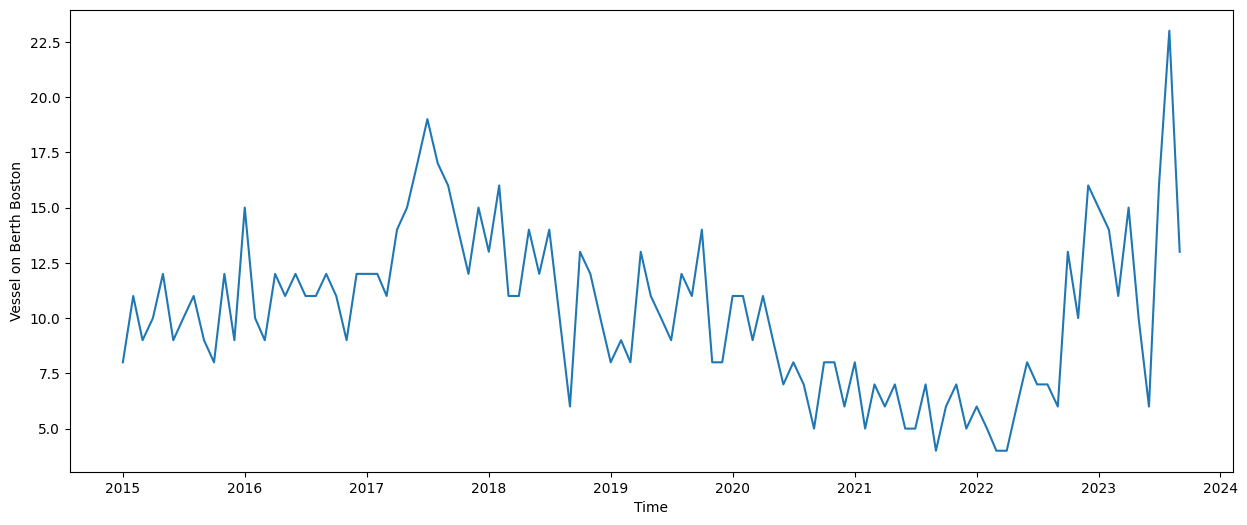

In [ ]:
plt.figure(figsize=(15,6))

plt.plot(vessel.index, vessel)
plt.xlabel('Time')
plt.ylabel('Vessel on Berth Boston')
plt.show()

# Set up work space

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from statsmodels.tsa.seasonal import seasonal_decompose

from xgboost import XGBRegressor

import warnings
warnings.simplefilter("ignore")

from IPython import get_ipython
get_ipython().config.InlineBackend.figure_format = 'retina'

#Configure plot styles

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

In [ ]:
def lagplot(x, y=None, shift=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(shift)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    title = f"Lag {shift}" if shift > 0 else f"Lead {shift}"
    ax.set(title=f"Lag {shift}", xlabel=x_.name, ylabel=y_.name)
    return ax

In [ ]:
def plot_lags(x,
              y=None,
              lags=6,
              leads=None,
              nrows=1,
              lagplot_kwargs={},
              **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    orig = leads is not None
    leads = leads or 0
    kwargs.setdefault('ncols', math.ceil((lags + orig + leads) / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        k -= leads + orig
        if k + 1 <= lags:
            ax = lagplot(x, y, shift=k + 1, ax=ax, **lagplot_kwargs)
            title = f"Lag {k + 1}" if k + 1 >= 0 else f"Lead {-k - 1}"
            ax.set_title(title, fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

# Boosted Hybrid

In [ ]:
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2 # Model 2 trains on the residuals of the forecast of model_1
        self.y_columns = None  # store column names from fit method


    def fit(self, X_1, X_2, y):
        # Train model_1
        self.model_1.fit(X_1, y)

        # Make predictions
        y_fit = pd.DataFrame(
            self.model_1.predict(X_1),
            index=X_1.index, columns=y.columns,
        )

        # Compute residuals
        y_resid = y - y_fit
        y_resid = y_resid.stack().squeeze() # wide to long

        # Train model_2 on residuals
        self.model_2.fit(X_2, y_resid)

        # Save column names for predict method
        self.y_columns = y.columns

        self.y_fit = y_fit
        self.y_resid = y_resid

    def predict(self, X_1, X_2):
        # Predict with model_1
        y_pred = pd.DataFrame(
            self.model_1.predict(X_1),
            index=X_1.index, columns=self.y_columns,
        )
        y_pred = y_pred.stack().squeeze()  # wide to long

        # Add model_2 predictions to model_1 predictions
        y_pred += self.model_2.predict(X_2)

        return y_pred.unstack()

## Value

In [ ]:
y1 = df_value['22 Beverages, Spirits And Vinegar']
y1 = y1.loc['2015-01-01':]
y1 = y1.loc[:].squeeze()
y1

Time
2015-01-01    31151021.0
2015-02-01    24794845.0
2015-03-01    38568001.0
2015-04-01    40693359.0
2015-05-01    49741833.0
                 ...    
2023-04-01    33497739.0
2023-05-01    40384107.0
2023-06-01    39033801.0
2023-07-01    29772975.0
2023-08-01    40149868.0
Name: 22 Beverages, Spirits And Vinegar, Length: 104, dtype: float64

<Axes: xlabel='Time'>

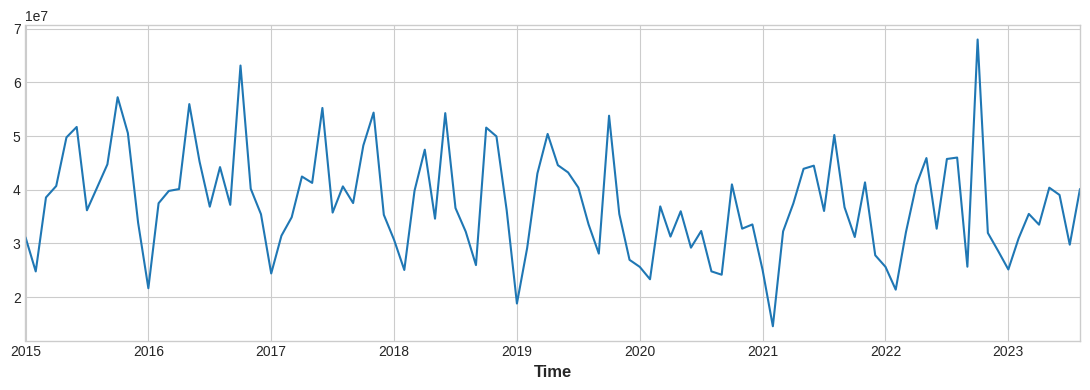

In [ ]:
y1.plot.line()

In [ ]:
fourier = CalendarFourier(freq='Y', order=6)
dp = DeterministicProcess(
    constant=True,
    index=y1.index,
    order=1,
    seasonal=True,
    drop=True,
    additional_terms=[fourier],
)
X_time = dp.in_sample()
X_time

const  trend  s(2,12)  s(3,12)  s(4,12)  s(5,12)  s(6,12)  \
Time                                                                    
2015-01-01    1.0    1.0      0.0      0.0      0.0      0.0      0.0   
2015-02-01    1.0    2.0      1.0      0.0      0.0      0.0      0.0   
2015-03-01    1.0    3.0      0.0      1.0      0.0      0.0      0.0   
2015-04-01    1.0    4.0      0.0      0.0      1.0      0.0      0.0   
2015-05-01    1.0    5.0      0.0      0.0      0.0      1.0      0.0   
...           ...    ...      ...      ...      ...      ...      ...   
2023-04-01    1.0  100.0      0.0      0.0      1.0      0.0      0.0   
2023-05-01    1.0  101.0      0.0      0.0      0.0      1.0      0.0   
2023-06-01    1.0  102.0      0.0      0.0      0.0      0.0      1.0   
2023-07-01    1.0  103.0      0.0      0.0      0.0      0.0      0.0   
2023-08-01    1.0  104.0      0.0      0.0      0.0      0.0      0.0   

            s(7,12)  s(8,12)  s(9,12)  ...  cos(1,freq=A-DEC)  \
Time                                   ...                      
2015-01-01      0.0      0.0      0.0  ...           1.000000   
2015-02-01      0.0      0.0      0.0  ...           0.860961   
2015-03-01      0.0      0.0      0.0  ...           0.527078   
2015-04-01      0.0      0.0      0.0  ...           0.021516   
2015-05-01      0.0      0.0      0.0  ...          -0.474951   
...             ...      ...      ...  ...                ...   
2023-04-01      0.0      0.0      0.0  ...           0.021516   
2023-05-01      0.0      0.0      0.0  ...          -0.474951   
2023-06-01      0.0      0.0      0.0  ...          -0.856551   
2023-07-01      1.0      0.0      0.0  ...          -0.999667   
2023-08-01      0.0      1.0      0.0  ...          -0.873807   

            sin(2,freq=A-DEC)  cos(2,freq=A-DEC)  sin(3,freq=A-DEC)  \
Time                                                                  
2015-01-01           0.000000           1.000000           0.000000   
2015-02-01           0.875892           0.482508           0.999546   
2015-03-01           0.895839          -0.444378           0.094537   
2015-04-01           0.043022          -0.999074          -0.997917   
2015-05-01          -0.835925          -0.548843          -0.085965   
...                       ...                ...                ...   
2023-04-01           0.043022          -0.999074          -0.997917   
2023-05-01          -0.835925          -0.548843          -0.085965   
2023-06-01          -0.884068           0.467359           0.998435   
2023-07-01          -0.051620           0.998667           0.077386   
2023-08-01           0.849817           0.527078          -0.998880   

            cos(3,freq=A-DEC)  sin(4,freq=A-DEC)  cos(4,freq=A-DEC)  \
Time                                                                  
2015-01-01           1.000000           0.000000           1.000000   
2015-02-01          -0.030120           0.845249          -0.534373   
2015-03-01          -0.995521          -0.796183          -0.605056   
2015-04-01          -0.064508          -0.085965           0.996298   
2015-05-01           0.996298           0.917584          -0.397543   
...                       ...                ...                ...   
2023-04-01          -0.064508          -0.085965           0.996298   
2023-05-01           0.996298           0.917584          -0.397543   
2023-06-01           0.055917          -0.826354          -0.563151   
2023-07-01          -0.997001          -0.103102           0.994671   
2023-08-01          -0.047321           0.895839          -0.444378   

            sin(5,freq=A-DEC)  cos(5,freq=A-DEC)  sin(6,freq=A-DEC)  
Time                                                                 
2015-01-01           0.000000           1.000000           0.000000  
2015-02-01           0.455907          -0.890028          -0.060213  
2015-03-01          -0.933837           0.357698          -0.188227  
2015-04-01        

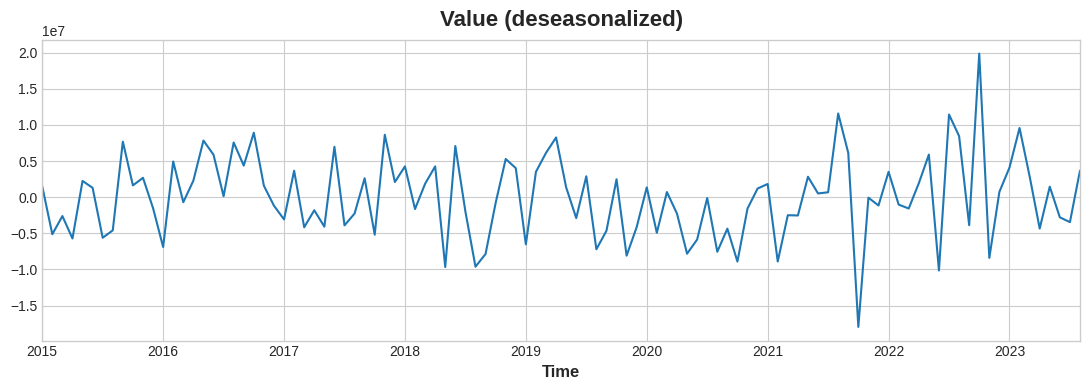

In [ ]:
fourier = CalendarFourier(freq='Y', order=12)
dp = DeterministicProcess(
    constant=True,
    index=y1.index,
    order=1,
    seasonal=True,
    drop=True,
    additional_terms=[fourier],
)
X_time = dp.in_sample()

model = LinearRegression(fit_intercept=False)
model.fit(X_time, y1)
y_deseason = y1 - model.predict(X_time)
y_deseason.name = 'value_deseasoned'

ax = y_deseason.plot()
ax.set_title("Value (deseasonalized)");

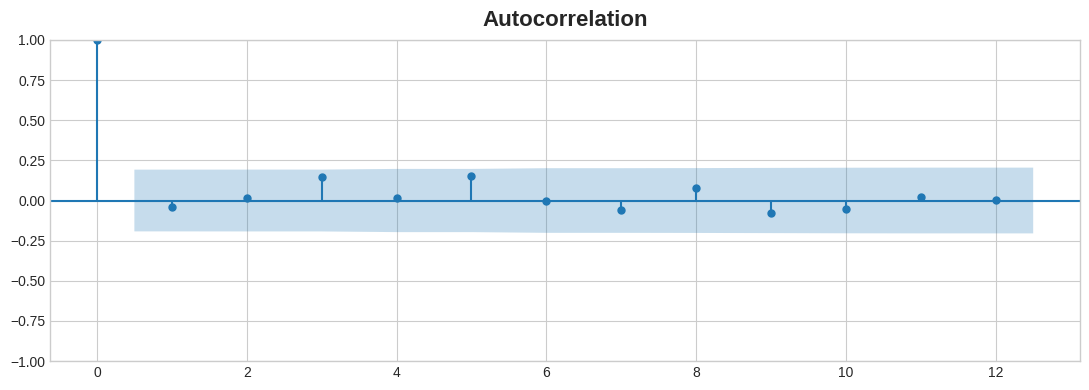

In [ ]:
plot_acf(y_deseason, lags=12);

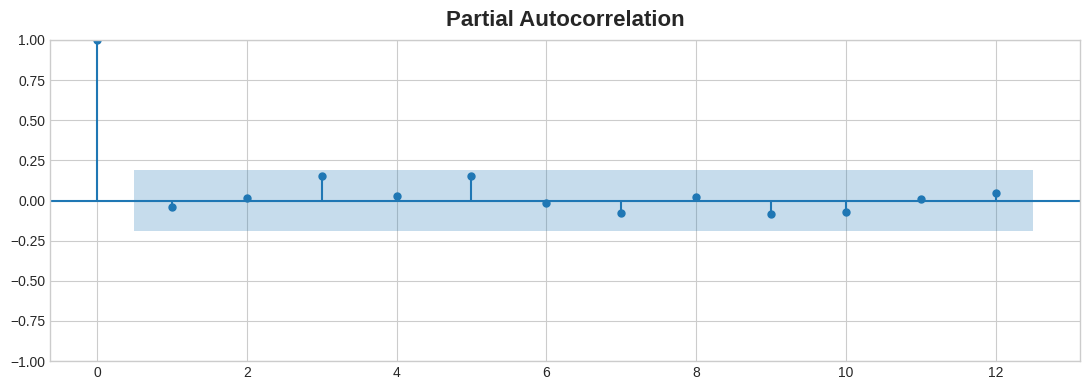

In [ ]:
plot_pacf(y_deseason, lags=12);

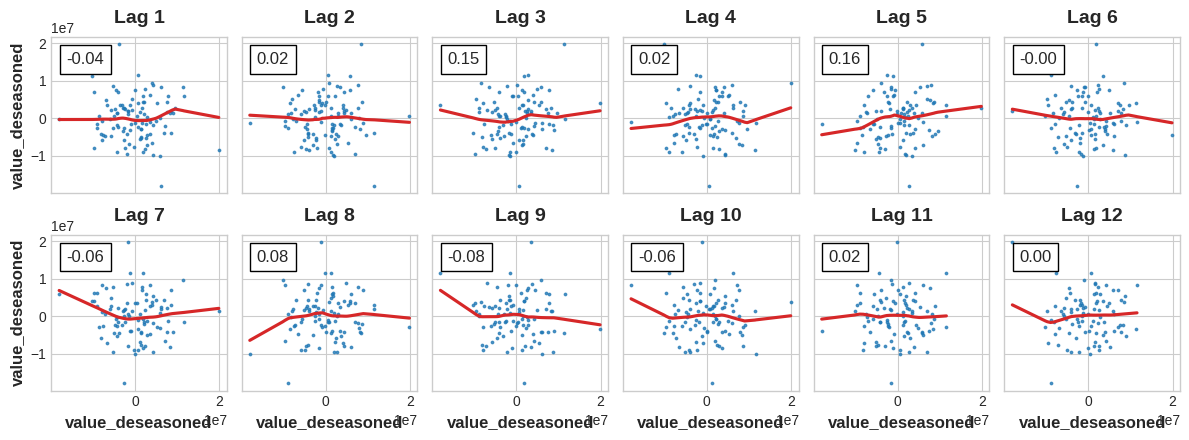

In [ ]:
plot_lags(y_deseason, lags=12, nrows=2);

In [ ]:
# create dataframe with n='lags' lags with 'lag_time' and prefixed by 'name'
def make_lags(ts, lags, lag_time=1, name='y'):
    return pd.concat(
        {f'{name}_lag_{i}': ts.shift(i)
         for i in range(lag_time, lags + lag_time)},
        axis=1)

# X_lags = make_lags(y_deseason, lags=1, name='y_deseason')

# X_1 = pd.concat([X_time, X_lags], axis=1).dropna()

# align y with X based on the index (date) and use inner join -- e.g. drop values from y, for which X has a empty (NaN) value
# y1, X_1 = y1.align(X_1, join='inner')

In [ ]:
X_1 = X_time.copy()
X_1 = X_1.loc['2015-02-01':]
X_1

const  trend  s(2,12)  s(3,12)  s(4,12)  s(5,12)  s(6,12)  \
Time                                                                    
2015-02-01    1.0    2.0      1.0      0.0      0.0      0.0      0.0   
2015-03-01    1.0    3.0      0.0      1.0      0.0      0.0      0.0   
2015-04-01    1.0    4.0      0.0      0.0      1.0      0.0      0.0   
2015-05-01    1.0    5.0      0.0      0.0      0.0      1.0      0.0   
2015-06-01    1.0    6.0      0.0      0.0      0.0      0.0      1.0   
...           ...    ...      ...      ...      ...      ...      ...   
2023-04-01    1.0  100.0      0.0      0.0      1.0      0.0      0.0   
2023-05-01    1.0  101.0      0.0      0.0      0.0      1.0      0.0   
2023-06-01    1.0  102.0      0.0      0.0      0.0      0.0      1.0   
2023-07-01    1.0  103.0      0.0      0.0      0.0      0.0      0.0   
2023-08-01    1.0  104.0      0.0      0.0      0.0      0.0      0.0   

            s(7,12)  s(8,12)  s(9,12)  ...  cos(1,freq=A-DEC)  \
Time                                   ...                      
2015-02-01      0.0      0.0      0.0  ...           0.860961   
2015-03-01      0.0      0.0      0.0  ...           0.527078   
2015-04-01      0.0      0.0      0.0  ...           0.021516   
2015-05-01      0.0      0.0      0.0  ...          -0.474951   
2015-06-01      0.0      0.0      0.0  ...          -0.856551   
...             ...      ...      ...  ...                ...   
2023-04-01      0.0      0.0      0.0  ...           0.021516   
2023-05-01      0.0      0.0      0.0  ...          -0.474951   
2023-06-01      0.0      0.0      0.0  ...          -0.856551   
2023-07-01      1.0      0.0      0.0  ...          -0.999667   
2023-08-01      0.0      1.0      0.0  ...          -0.873807   

            sin(2,freq=A-DEC)  cos(2,freq=A-DEC)  sin(3,freq=A-DEC)  \
Time                                                                  
2015-02-01           0.875892           0.482508           0.999546   
2015-03-01           0.895839          -0.444378           0.094537   
2015-04-01           0.043022          -0.999074          -0.997917   
2015-05-01          -0.835925          -0.548843          -0.085965   
2015-06-01          -0.884068           0.467359           0.998435   
...                       ...                ...                ...   
2023-04-01           0.043022          -0.999074          -0.997917   
2023-05-01          -0.835925          -0.548843          -0.085965   
2023-06-01          -0.884068           0.467359           0.998435   
2023-07-01          -0.051620           0.998667           0.077386   
2023-08-01           0.849817           0.527078          -0.998880   

            cos(3,freq=A-DEC)  sin(4,freq=A-DEC)  cos(4,freq=A-DEC)  \
Time                                                                  
2015-02-01          -0.030120           0.845249          -0.534373   
2015-03-01          -0.995521          -0.796183          -0.605056   
2015-04-01          -0.064508          -0.085965           0.996298   
2015-05-01           0.996298           0.917584          -0.397543   
2015-06-01           0.055917          -0.826354          -0.563151   
...                       ...                ...                ...   
2023-04-01          -0.064508          -0.085965           0.996298   
2023-05-01           0.996298           0.917584          -0.397543   
2023-06-01           0.055917          -0.826354          -0.563151   
2023-07-01          -0.997001          -0.103102           0.994671   
2023-08-01          -0.047321           0.895839          -0.444378   

            sin(5,freq=A-DEC)  cos(5,freq=A-DEC)  sin(6,freq=A-DEC)  
Time                                                                 
2015-02-01           0.455907          -0.890028          -0.060213  
2015-03-01          -0.933837           0.357698          -0.188227  
2015-04-01           0.994218           0.107381           0.128748  
2015-05-01        

In [ ]:
X_2 = pd.DataFrame(df_value.stack())
X_2

0
Time       Commodity                                                     
2003-01-01 03 Fish, Crustaceans & Aquatic Invertebrates        29386199.0
           22 Beverages, Spirits And Vinegar                   11795099.0
           39 Plastics And Articles Thereof                     3877912.0
           84 Nuclear Reactors, Boilers, Machinery Etc.; P...  16211339.0
           85 Electric Machinery Etc; Sound Equip; Tv Equi...   8959654.0
...                                                                   ...
2023-08-01 03 Fish, Crustaceans & Aquatic Invertebrates        35324050.0
           22 Beverages, Spirits And Vinegar                   40149868.0
           39 Plastics And Articles Thereof                    26999655.0
           84 Nuclear Reactors, Boilers, Machinery Etc.; P...  76513296.0
           85 Electric Machinery Etc; Sound Equip; Tv Equi...  27236561.0

[1240 rows x 1 columns]

In [ ]:
le = LabelEncoder()
X_2w = X_2.reset_index('Commodity')
X_2w['Commodity'] = le.fit_transform(X_2w['Commodity'])
X_2w["Month"] = X_2w.index.month

X_2w.drop(columns=0,inplace=True)
X_2w['HolidayMonth'] = np.where((X_2w['Month'] == 4) | (X_2w['Month'] == 9) | (X_2w['Month'] == 10) | (X_2w['Month'] == 11), '1', '0')
# X_2w['IfCovid'] = np.where((X_2w.index >= '2020-03-01') & (X_2w.index <= '2022-03-01'), '1', '0')
X_2w['Vessel'] = vessel['IMO'].reindex(X_2w.index).shift(5)
X_2w = X_2w.dropna()
# X_2w = X_2w.loc['2015-02-01':]
X_2w

Commodity  Month HolidayMonth  Vessel
Time                                             
2015-02-01          0      2            0     8.0
2015-02-01          1      2            0     8.0
2015-02-01          2      2            0     8.0
2015-02-01          3      2            0     8.0
2015-02-01          4      2            0     8.0
...               ...    ...          ...     ...
2023-08-01          0      8            0    16.0
2023-08-01          1      8            0    16.0
2023-08-01          2      8            0    16.0
2023-08-01          3      8            0    16.0
2023-08-01          4      8            0    16.0

[515 rows x 4 columns]

In [ ]:
le = LabelEncoder()
X_2wo = X_2.reset_index('Commodity')
X_2wo['Commodity'] = le.fit_transform(X_2wo['Commodity'])
X_2wo["Month"] = X_2wo.index.month

X_2wo.drop(columns=0,inplace=True)
X_2wo['HolidayMonth'] = np.where((X_2wo['Month'] == 4) | (X_2wo['Month'] == 9) | (X_2wo['Month'] == 10) | (X_2wo['Month'] == 11), '1', '0')
# X_2w['IfCovid'] = np.where((X_2w.index >= '2020-03-01') & (X_2w.index <= '2022-03-01'), '1', '0')
# X_2wo['Vessel'] = vessel['IMO'].reindex(X_2wo.index)
X_2wo = X_2wo.dropna()
X_2wo = X_2wo.loc['2015-02-01':]
X_2wo

Commodity  Month HolidayMonth
Time                                     
2015-02-01          0      2            0
2015-02-01          1      2            0
2015-02-01          2      2            0
2015-02-01          3      2            0
2015-02-01          4      2            0
...               ...    ...          ...
2023-08-01          0      8            0
2023-08-01          1      8            0
2023-08-01          2      8            0
2023-08-01          3      8            0
2023-08-01          4      8            0

[515 rows x 3 columns]

In [ ]:
y1 = df_value.loc['2015-02-01':]
y1

Commodity   03 Fish, Crustaceans & Aquatic Invertebrates  \
Time                                                       
2015-02-01                                    45521826.0   
2015-03-01                                    38610524.0   
2015-04-01                                    11313390.0   
2015-05-01                                    21925023.0   
2015-06-01                                    33038736.0   
...                                                  ...   
2023-04-01                                    25437932.0   
2023-05-01                                    34502535.0   
2023-06-01                                    27687079.0   
2023-07-01                                    32756416.0   
2023-08-01                                    35324050.0   

Commodity   22 Beverages, Spirits And Vinegar  \
Time                                            
2015-02-01                         24794845.0   
2015-03-01                         38568001.0   
2015-04-01                         40693359.0   
2015-05-01                         49741833.0   
2015-06-01                         51686150.0   
...                                       ...   
2023-04-01                         33497739.0   
2023-05-01                         40384107.0   
2023-06-01                         39033801.0   
2023-07-01                         29772975.0   
2023-08-01                         40149868.0   

Commodity   39 Plastics And Articles Thereof  \
Time                                           
2015-02-01                        15366101.0   
2015-03-01                        19570948.0   
2015-04-01                        17498689.0   
2015-05-01                        15563745.0   
2015-06-01                        17473478.0   
...                                      ...   
2023-04-01                        22052627.0   
2023-05-01                        25727748.0   
2023-06-01                        15645296.0   
2023-07-01                        20190060.0   
2023-08-01                        26999655.0   

Commodity   84 Nuclear Reactors, Boilers, Machinery Etc.; Parts  \
Time                                                              
2015-02-01                                         47600211.0     
2015-03-01                                         54202863.0     
2015-04-01                                         46464496.0     
2015-05-01                                         54036648.0     
2015-06-01                                         46654430.0     
...                                                       ...     
2023-04-01                                         53330039.0     
2023-05-01                                         64351866.0     
2023-06-01                                         53942981.0     
2023-07-01                                         52292641.0     
2023-08-01                                         76513296.0     

Commodity   85 Electric Machinery Etc; Sound Equip; Tv Equip; Pts  
Time                                                               
2015-02-01                                         16351068.0      
2015-03-01                                         18929609.0      
2015-04-01                                         15886178.0      
2015-05-01                                         18698092.0      
2015-06-01                                         22099165.0      
...                                                       ...      
2023-04-01                                         26138936.0      
2023-05-01                                         23862168.0      
2023-06-01                                         15986702.0      
2023-07-01                                         31984723.0      
2023-08-01                                         27236561.0      

[103 rows x 5 columns]

In [ ]:

# model.fit(X_1, X_2, y1)

# y1_pred = model.predict(X_1, X_2)
# y1_pred = y1_pred.clip(0.0)

In [ ]:
from matplotlib.ticker import AutoLocator
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

MAPE of train dataset: 0.12309134303228743
MAPE of test dataset: 0.20492374734118737
RMSE of train dataset: 5147899.469329505
RMSE of test dataset: 10119055.852684608
MAE of train dataset: 4308912.242057405
MAE of test dataset: 7941638.050543834


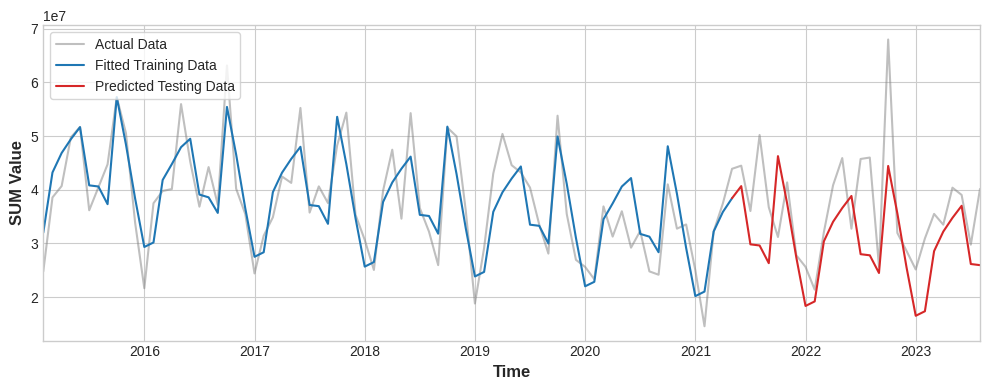

In [ ]:
# without vessel on berth
def plot_model_results(model):
    #Split 2017 data into train and validation split after the 1st of July.
    y_train, y_valid = y1[:"2021-05-01"], y1["2021-05-01":]
    X1_train, X1_valid = X_1[: "2021-05-01"], X_1["2021-05-01" :]
    X2_train, X2_valid = X_2wo.loc[:"2021-05-01"], X_2wo.loc["2021-05-01":]

    # Some of the algorithms above do best with certain kinds of
    # preprocessing on the features (like standardization), but this is
    # just a demo.
    model = BoostedHybrid(
        model_1=Ridge(),
        model_2=RandomForestRegressor(),
        )
    model.fit(X1_train, X2_train, y_train)
    y_fit = model.predict(X1_train, X2_train).clip(0.0) #.clip(0.0) removes negative values
    y_pred = model.predict(X1_valid, X2_valid).clip(0.0) #.clip(0.0) removes negative values

    selected_column = 1
    MAPE_train = mean_absolute_percentage_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAPE_test = mean_absolute_percentage_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAPE of train dataset:', MAPE_train)
    print('MAPE of test dataset:', MAPE_test)
    RMSE_train = mean_squared_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column], squared=False)
    RMSE_test = mean_squared_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column], squared=False)
    print('RMSE of train dataset:', RMSE_train)
    print('RMSE of test dataset:', RMSE_test)
    MAE_train = mean_absolute_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAE_test = mean_absolute_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAE of train dataset:', MAE_train)
    print('MAE of test dataset:', MAE_test)

    commodity = y1.columns[1]
    ax = y1[commodity].plot(
    figsize=(10, 4), alpha=0.5, color='gray', label='Actual Data'
    )

    dates = pd.date_range(start=y1.index.min(), end=y1.index.max(), freq='YS')

    y_fit[commodity].plot(ax=ax, color='C0', label='Fitted Training Data')

    y_pred[commodity].plot(ax=ax, color='C3', label='Predicted Testing Data')

    ax.set_ylabel('SUM Value')
    ax.set_xlabel('Time')
    ax.legend(loc='upper left', frameon=True)

# # Update the legends
#     for ax in axs:
#         # This will collect the labels & handles and update the legend
#         lines, labels = ax.get_lines(), ['Actual Data', 'Fitted Training Data', 'Predicted Testing Data']
#         ax.legend(lines, labels, loc='upper left', frameon=True)
#         ax.set_xticks(dates)
#         ax.xaxis.set_major_formatter(plt.FixedFormatter(dates.strftime('%Y')))
#         ax.set_ylabel('SUM Value')
#         ax.set_xlabel('Time')
    plt.tight_layout()
    plt.show()

plot_model_results(model)

MAPE of train dataset: 0.0667329786816277
MAPE of test dataset: 0.1948852190548889
RMSE of train dataset: 2872019.6693510497
RMSE of test dataset: 10076968.797612324
MAE of train dataset: 2327978.671623487
MAE of test dataset: 7749387.597307885


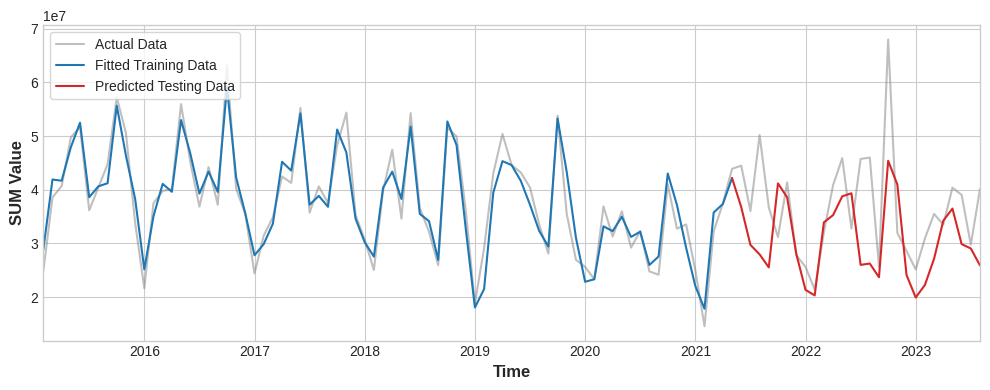

In [ ]:
# with vessel on berth
def plot_model_results(model):
    #Split 2017 data into train and validation split after the 1st of July.
    y_train, y_valid = y1[:"2021-05-01"], y1["2021-05-01":]
    X1_train, X1_valid = X_1[: "2021-05-01"], X_1["2021-05-01" :]
    X2_train, X2_valid = X_2w.loc[:"2021-05-01"], X_2w.loc["2021-05-01":]

    # Some of the algorithms above do best with certain kinds of
    # preprocessing on the features (like standardization), but this is
    # just a demo.
    model = BoostedHybrid(
        model_1=Ridge(),
        model_2=RandomForestRegressor(),
        )
    model.fit(X1_train, X2_train, y_train)
    y_fit = model.predict(X1_train, X2_train).clip(0.0) #.clip(0.0) removes negative values
    y_pred = model.predict(X1_valid, X2_valid).clip(0.0) #.clip(0.0) removes negative values

    selected_column = 1
    MAPE_train = mean_absolute_percentage_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAPE_test = mean_absolute_percentage_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAPE of train dataset:', MAPE_train)
    print('MAPE of test dataset:', MAPE_test)
    RMSE_train = mean_squared_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column], squared=False)
    RMSE_test = mean_squared_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column], squared=False)
    print('RMSE of train dataset:', RMSE_train)
    print('RMSE of test dataset:', RMSE_test)
    MAE_train = mean_absolute_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAE_test = mean_absolute_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAE of train dataset:', MAE_train)
    print('MAE of test dataset:', MAE_test)

    commodity = y1.columns[1]
    ax = y1[commodity].plot(
    figsize=(10, 4), alpha=0.5, color='gray', label='Actual Data'
    )

    dates = pd.date_range(start=y1.index.min(), end=y1.index.max(), freq='YS')

    y_fit[commodity].plot(ax=ax, color='C0', label='Fitted Training Data')

    y_pred[commodity].plot(ax=ax, color='C3', label='Predicted Testing Data')

    ax.set_ylabel('SUM Value')
    ax.set_xlabel('Time')
    ax.legend(loc='upper left', frameon=True)

# # Update the legends
#     for ax in axs:
#         # This will collect the labels & handles and update the legend
#         lines, labels = ax.get_lines(), ['Actual Data', 'Fitted Training Data', 'Predicted Testing Data']
#         ax.legend(lines, labels, loc='upper left', frameon=True)
#         ax.set_xticks(dates)
#         ax.xaxis.set_major_formatter(plt.FixedFormatter(dates.strftime('%Y')))
#         ax.set_ylabel('SUM Value')
#         ax.set_xlabel('Time')
    plt.tight_layout()
    plt.show()

plot_model_results(model)

## Weight

In [ ]:
y2 = df_weight['22 Beverages, Spirits And Vinegar']
y2 = y2.loc['2015-01-01':]
y2 = y2.loc[:].squeeze()
y2

Time
2015-01-01    11197693.0
2015-02-01    11324540.0
2015-03-01    13675124.0
2015-04-01    19134712.0
2015-05-01    20502318.0
                 ...    
2023-04-01     9091357.0
2023-05-01    11719471.0
2023-06-01    10524393.0
2023-07-01     9019337.0
2023-08-01    12479391.0
Name: 22 Beverages, Spirits And Vinegar, Length: 104, dtype: float64

<Axes: xlabel='Time'>

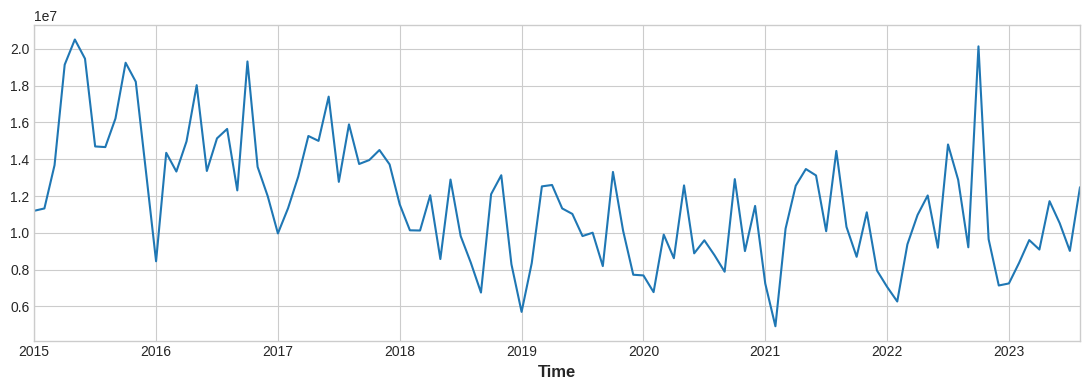

In [ ]:
y2.plot.line()

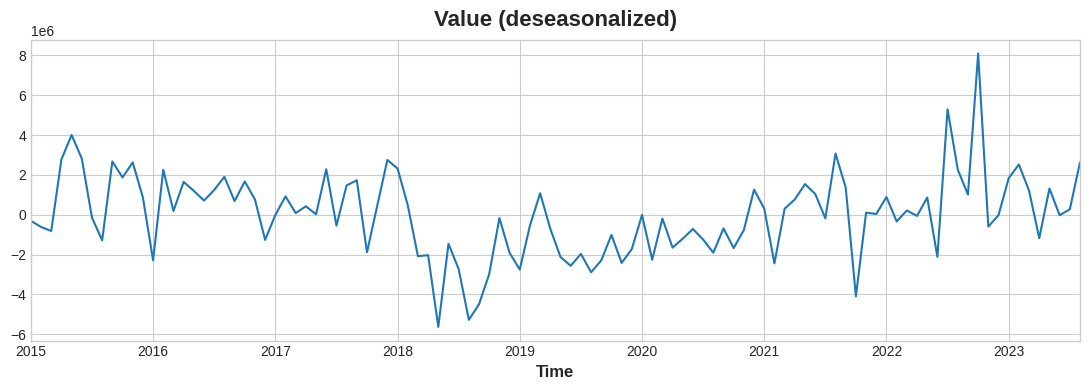

In [ ]:
fourier = CalendarFourier(freq='Y', order=12)
dp = DeterministicProcess(
    constant=True,
    index=y2.index,
    order=1,
    seasonal=True,
    drop=True,
    additional_terms=[fourier],
)
X_time = dp.in_sample()

model = LinearRegression(fit_intercept=False)
model.fit(X_time, y2)
y2_deseason = y2 - model.predict(X_time)
y2_deseason.name = 'value_deseasoned'

ax = y2_deseason.plot()
ax.set_title("Value (deseasonalized)");

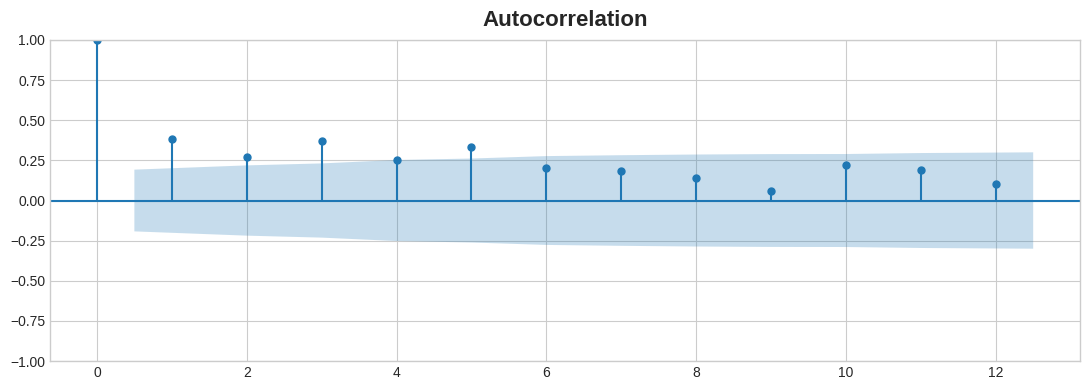

In [ ]:
plot_acf(y2_deseason, lags=12);

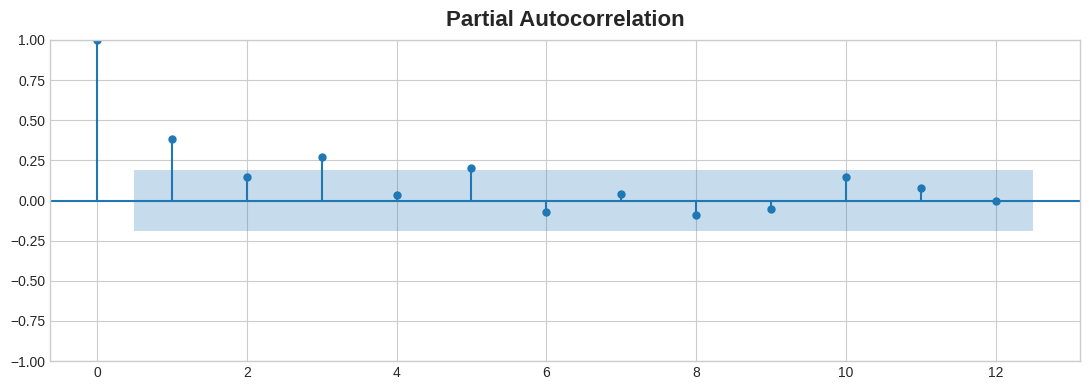

In [ ]:
plot_pacf(y2_deseason, lags=12);

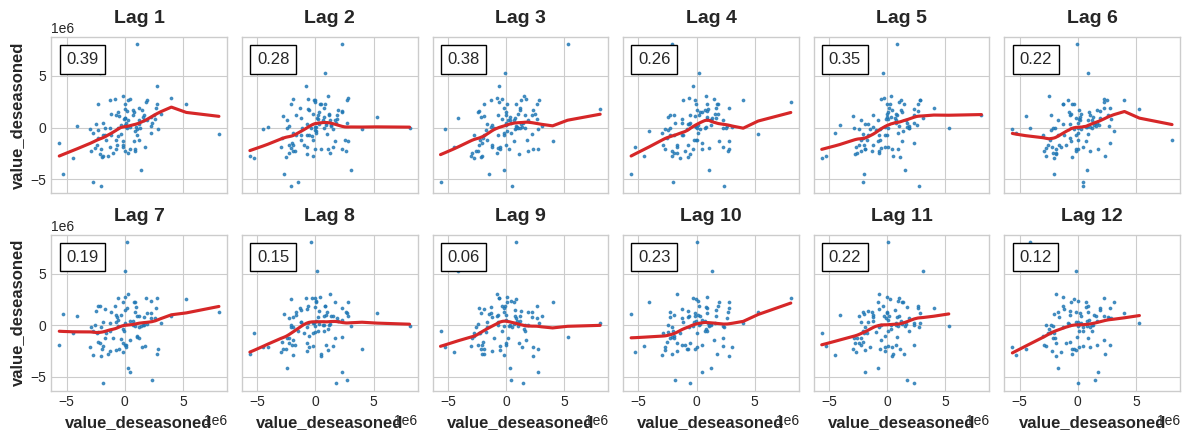

In [ ]:
plot_lags(y2_deseason, lags=12, nrows=2);

In [ ]:
# X2_lags = make_lags(y2_deseason, lags=1, name='y2_deseason')

# X2_1 = pd.concat([X_time, X2_lags], axis=1).dropna()

# # align y with X based on the index (date) and use inner join -- e.g. drop values from y, for which X has a empty (NaN) value
# y2, X2_1 = y2.align(X2_1, join='inner')

In [ ]:
X2_1 = X_time.copy()
X2_1 = X2_1.loc['2015-02-01':]
X2_1

const  trend  s(2,12)  s(3,12)  s(4,12)  s(5,12)  s(6,12)  \
Time                                                                    
2015-02-01    1.0    2.0      1.0      0.0      0.0      0.0      0.0   
2015-03-01    1.0    3.0      0.0      1.0      0.0      0.0      0.0   
2015-04-01    1.0    4.0      0.0      0.0      1.0      0.0      0.0   
2015-05-01    1.0    5.0      0.0      0.0      0.0      1.0      0.0   
2015-06-01    1.0    6.0      0.0      0.0      0.0      0.0      1.0   
...           ...    ...      ...      ...      ...      ...      ...   
2023-04-01    1.0  100.0      0.0      0.0      1.0      0.0      0.0   
2023-05-01    1.0  101.0      0.0      0.0      0.0      1.0      0.0   
2023-06-01    1.0  102.0      0.0      0.0      0.0      0.0      1.0   
2023-07-01    1.0  103.0      0.0      0.0      0.0      0.0      0.0   
2023-08-01    1.0  104.0      0.0      0.0      0.0      0.0      0.0   

            s(7,12)  s(8,12)  s(9,12)  ...  cos(1,freq=A-DEC)  \
Time                                   ...                      
2015-02-01      0.0      0.0      0.0  ...           0.860961   
2015-03-01      0.0      0.0      0.0  ...           0.527078   
2015-04-01      0.0      0.0      0.0  ...           0.021516   
2015-05-01      0.0      0.0      0.0  ...          -0.474951   
2015-06-01      0.0      0.0      0.0  ...          -0.856551   
...             ...      ...      ...  ...                ...   
2023-04-01      0.0      0.0      0.0  ...           0.021516   
2023-05-01      0.0      0.0      0.0  ...          -0.474951   
2023-06-01      0.0      0.0      0.0  ...          -0.856551   
2023-07-01      1.0      0.0      0.0  ...          -0.999667   
2023-08-01      0.0      1.0      0.0  ...          -0.873807   

            sin(2,freq=A-DEC)  cos(2,freq=A-DEC)  sin(3,freq=A-DEC)  \
Time                                                                  
2015-02-01           0.875892           0.482508           0.999546   
2015-03-01           0.895839          -0.444378           0.094537   
2015-04-01           0.043022          -0.999074          -0.997917   
2015-05-01          -0.835925          -0.548843          -0.085965   
2015-06-01          -0.884068           0.467359           0.998435   
...                       ...                ...                ...   
2023-04-01           0.043022          -0.999074          -0.997917   
2023-05-01          -0.835925          -0.548843          -0.085965   
2023-06-01          -0.884068           0.467359           0.998435   
2023-07-01          -0.051620           0.998667           0.077386   
2023-08-01           0.849817           0.527078          -0.998880   

            cos(3,freq=A-DEC)  sin(4,freq=A-DEC)  cos(4,freq=A-DEC)  \
Time                                                                  
2015-02-01          -0.030120           0.845249          -0.534373   
2015-03-01          -0.995521          -0.796183          -0.605056   
2015-04-01          -0.064508          -0.085965           0.996298   
2015-05-01           0.996298           0.917584          -0.397543   
2015-06-01           0.055917          -0.826354          -0.563151   
...                       ...                ...                ...   
2023-04-01          -0.064508          -0.085965           0.996298   
2023-05-01           0.996298           0.917584          -0.397543   
2023-06-01           0.055917          -0.826354          -0.563151   
2023-07-01          -0.997001          -0.103102           0.994671   
2023-08-01          -0.047321           0.895839          -0.444378   

            sin(5,freq=A-DEC)  cos(5,freq=A-DEC)  sin(6,freq=A-DEC)  
Time                                                                 
2015-02-01           0.455907          -0.890028          -0.060213  
2015-03-01          -0.933837           0.357698          -0.188227  
2015-04-01           0.994218           0.107381           0.128748  
2015-05-01        

In [ ]:
X2_2 = pd.DataFrame(df_weight.stack())
X2_2

0
Time       Commodity                                                     
2003-01-01 03 Fish, Crustaceans & Aquatic Invertebrates         7387051.0
           22 Beverages, Spirits And Vinegar                    8132881.0
           25 Salt; Sulfur; Earth & Stone; Lime & Cement P...     10698.0
           27 Mineral Fuel, Oil Etc.; Bitumin Subst; Miner...     32141.0
           68 Art Of Stone, Plaster, Cement, Asbestos, Mic...   2057732.0
...                                                                   ...
2023-08-01 03 Fish, Crustaceans & Aquatic Invertebrates         5097673.0
           22 Beverages, Spirits And Vinegar                   12479391.0
           25 Salt; Sulfur; Earth & Stone; Lime & Cement P...    929589.0
           27 Mineral Fuel, Oil Etc.; Bitumin Subst; Miner...  15086933.0
           68 Art Of Stone, Plaster, Cement, Asbestos, Mic...  11346714.0

[1239 rows x 1 columns]

In [ ]:
le = LabelEncoder()
X2_2w = X2_2.reset_index('Commodity')
X2_2w['Commodity'] = le.fit_transform(X2_2w['Commodity'])
X2_2w["Month"] = X2_2w.index.month

X2_2w.drop(columns=0,inplace=True)
X2_2w['HolidayMonth'] = np.where((X2_2w['Month'] == 4) | (X2_2w['Month'] == 9) | (X2_2w['Month'] == 10) | (X2_2w['Month'] == 11), '1', '0')
# X2_2['IfCovid'] = np.where((X2_2.index >= '2020-03-01') & (X2_2.index <= '2022-03-01'), '1', '0')
X2_2w['Vessel'] = vessel['IMO'].reindex(X2_2w.index).shift(5)
X2_2w = X2_2w.dropna()
# X2_2w = X2_2w.loc['2015-02-01':]
X2_2w

Commodity  Month HolidayMonth  Vessel
Time                                             
2015-02-01          0      2            0     8.0
2015-02-01          1      2            0     8.0
2015-02-01          2      2            0     8.0
2015-02-01          3      2            0     8.0
2015-02-01          4      2            0     8.0
...               ...    ...          ...     ...
2023-08-01          0      8            0    16.0
2023-08-01          1      8            0    16.0
2023-08-01          2      8            0    16.0
2023-08-01          3      8            0    16.0
2023-08-01          4      8            0    16.0

[515 rows x 4 columns]

In [ ]:
le = LabelEncoder()
X2_2wo = X2_2.reset_index('Commodity')
X2_2wo['Commodity'] = le.fit_transform(X2_2wo['Commodity'])
X2_2wo["Month"] = X2_2wo.index.month

X2_2wo.drop(columns=0,inplace=True)
X2_2wo['HolidayMonth'] = np.where((X2_2wo['Month'] == 4) | (X2_2wo['Month'] == 9) | (X2_2wo['Month'] == 10) | (X2_2wo['Month'] == 11), '1', '0')
# X2_2['IfCovid'] = np.where((X2_2.index >= '2020-03-01') & (X2_2.index <= '2022-03-01'), '1', '0')
# X2_2w['Vessel'] = vessel['IMO'].reindex(X2_2w.index)
X2_2wo = X2_2wo.dropna()
X2_2wo = X2_2wo.loc['2015-02-01':]
X2_2wo

Commodity  Month HolidayMonth
Time                                     
2015-02-01          0      2            0
2015-02-01          1      2            0
2015-02-01          2      2            0
2015-02-01          3      2            0
2015-02-01          4      2            0
...               ...    ...          ...
2023-08-01          0      8            0
2023-08-01          1      8            0
2023-08-01          2      8            0
2023-08-01          3      8            0
2023-08-01          4      8            0

[515 rows x 3 columns]

In [ ]:
y2 = df_weight.loc['2015-02-01':]
y2

Commodity   03 Fish, Crustaceans & Aquatic Invertebrates  \
Time                                                       
2015-02-01                                     8433077.0   
2015-03-01                                     7861379.0   
2015-04-01                                     2277996.0   
2015-05-01                                     4430818.0   
2015-06-01                                     6721846.0   
...                                                  ...   
2023-04-01                                     3390034.0   
2023-05-01                                     4873265.0   
2023-06-01                                     4053676.0   
2023-07-01                                     4720685.0   
2023-08-01                                     5097673.0   

Commodity   22 Beverages, Spirits And Vinegar  \
Time                                            
2015-02-01                         11324540.0   
2015-03-01                         13675124.0   
2015-04-01                         19134712.0   
2015-05-01                         20502318.0   
2015-06-01                         19460739.0   
...                                       ...   
2023-04-01                          9091357.0   
2023-05-01                         11719471.0   
2023-06-01                         10524393.0   
2023-07-01                          9019337.0   
2023-08-01                         12479391.0   

Commodity   25 Salt; Sulfur; Earth & Stone; Lime & Cement Plaster  \
Time                                                                
2015-02-01                                           105275.0       
2015-03-01                                         59665335.0       
2015-04-01                                           153482.0       
2015-05-01                                           188861.0       
2015-06-01                                           211897.0       
...                                                       ...       
2023-04-01                                           343595.0       
2023-05-01                                           507538.0       
2023-06-01                                           320448.0       
2023-07-01                                           453224.0       
2023-08-01                                           929589.0       

Commodity   27 Mineral Fuel, Oil Etc.; Bitumin Subst; Mineral Wax  \
Time                                                                
2015-02-01                                         57025419.0       
2015-03-01                                            70116.0       
2015-04-01                                            68877.0       
2015-05-01                                           309674.0       
2015-06-01                                            17691.0       
...                                                       ...       
2023-04-01                                            15950.0       
2023-05-01                                             9129.0       
2023-06-01                                            73477.0       
2023-07-01                                            53412.0       
2023-08-01                                         15086933.0       

Commodity   68 Art Of Stone, Plaster, Cement, Asbestos, Mica Etc.  
Time                                                               
2015-02-01                                          2769127.0      
2015-03-01                                          4132697.0      
2015-04-01                                          3550810.0      
2015-05-01                                          4649706.0      
2015-06-01                                         23895083.0      
...                                                       ...      
2023-04-01                                          5651827.0      
2023-05-01                                          9573438.0      
2023-06-01                                          5010871.0      
2023-07-01                           

MAPE of train dataset: 0.13286960695096414
MAPE of test dataset: 0.34607351800550434
RMSE of train dataset: 1813812.5871354842
RMSE of test dataset: 4383270.321949669
MAE of train dataset: 1481529.4014504224
MAE of test dataset: 3778303.98026542


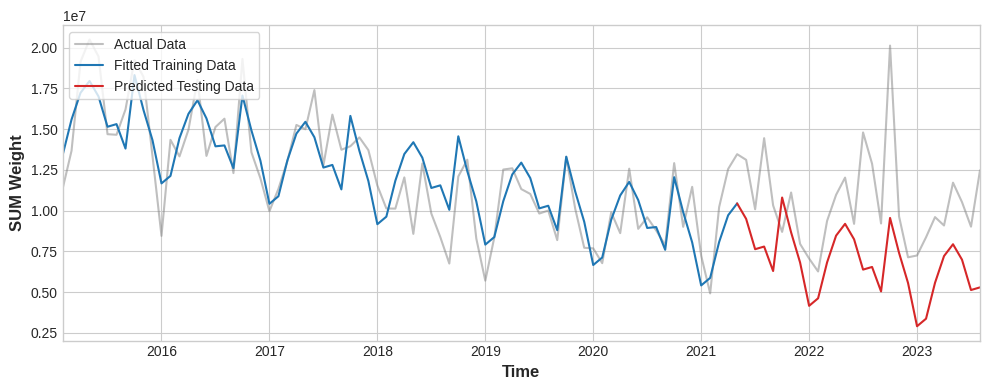

In [ ]:
# without vessel on berth
def plot_model_results(model):
    #Split 2017 data into train and validation split after the 1st of July.
    y_train, y_valid = y2[:"2021-05-01"], y2["2021-05-01":]
    X1_train, X1_valid = X2_1[: "2021-05-01"], X2_1["2021-05-01" :]
    X2_train, X2_valid = X2_2wo.loc[:"2021-05-01"], X2_2wo.loc["2021-05-01":]

    # Some of the algorithms above do best with certain kinds of
    # preprocessing on the features (like standardization), but this is
    # just a demo.
    model = BoostedHybrid(
    model_1=Ridge(),
    model_2=RandomForestRegressor(),
    )
    model.fit(X1_train, X2_train, y_train)
    y_fit = model.predict(X1_train, X2_train).clip(0.0) #.clip(0.0) removes negative values
    y_pred = model.predict(X1_valid, X2_valid).clip(0.0) #.clip(0.0) removes negative values

    selected_column = 1
    MAPE_train = mean_absolute_percentage_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAPE_test = mean_absolute_percentage_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAPE of train dataset:', MAPE_train)
    print('MAPE of test dataset:', MAPE_test)
    RMSE_train = mean_squared_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column], squared=False)
    RMSE_test = mean_squared_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column], squared=False)
    print('RMSE of train dataset:', RMSE_train)
    print('RMSE of test dataset:', RMSE_test)
    MAE_train = mean_absolute_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAE_test = mean_absolute_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAE of train dataset:', MAE_train)
    print('MAE of test dataset:', MAE_test)

    commodity = y2.columns[1]
    ax = y2[commodity].plot(
    figsize=(10, 4), alpha=0.5, color='gray', label='Actual Data'
    )

    dates = pd.date_range(start=y1.index.min(), end=y1.index.max(), freq='YS')

    y_fit[commodity].plot(ax=ax, color='C0', label='Fitted Training Data')

    y_pred[commodity].plot(ax=ax, color='C3', label='Predicted Testing Data')

    ax.set_ylabel('SUM Weight')
    ax.set_xlabel('Time')
    ax.legend(loc='upper left', frameon=True)

# # Update the legends
#     for ax in axs:
#         # This will collect the labels & handles and update the legend
#         lines, labels = ax.get_lines(), ['Actual Data', 'Fitted Training Data', 'Predicted Testing Data']
#         ax.legend(lines, labels, loc='upper left', frameon=True)
#         ax.set_xticks(dates)
#         ax.xaxis.set_major_formatter(plt.FixedFormatter(dates.strftime('%Y')))
#         ax.set_ylabel('SUM Value')
#         ax.set_xlabel('Time')
    plt.tight_layout()
    plt.show()

plot_model_results(model)

In [ ]:
y2.columns[1]

'22 Beverages, Spirits And Vinegar'

MAPE of train dataset: 0.0830971476513001
MAPE of test dataset: 0.28481579457336925
RMSE of train dataset: 1221201.260880254
RMSE of test dataset: 4054472.851128158
MAE of train dataset: 958454.5851486033
MAE of test dataset: 3146219.3030444523


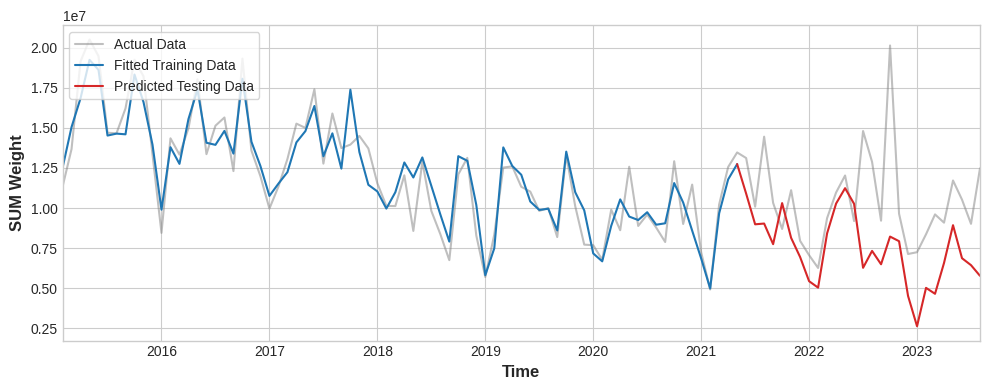

In [ ]:
# with vessel on berth
def plot_model_results(model):
    #Split 2017 data into train and validation split after the 1st of July.
    y_train, y_valid = y2[:"2021-05-01"], y2["2021-05-01":]
    X1_train, X1_valid = X2_1[: "2021-05-01"], X2_1["2021-05-01" :]
    X2_train, X2_valid = X2_2w.loc[:"2021-05-01"], X2_2w.loc["2021-05-01":]

    # Some of the algorithms above do best with certain kinds of
    # preprocessing on the features (like standardization), but this is
    # just a demo.
    model = BoostedHybrid(
    model_1=Ridge(),
    model_2=RandomForestRegressor(),
    )
    model.fit(X1_train, X2_train, y_train)
    y_fit = model.predict(X1_train, X2_train).clip(0.0) #.clip(0.0) removes negative values
    y_pred = model.predict(X1_valid, X2_valid).clip(0.0) #.clip(0.0) removes negative values

    selected_column = 1
    MAPE_train = mean_absolute_percentage_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAPE_test = mean_absolute_percentage_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAPE of train dataset:', MAPE_train)
    print('MAPE of test dataset:', MAPE_test)
    RMSE_train = mean_squared_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column], squared=False)
    RMSE_test = mean_squared_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column], squared=False)
    print('RMSE of train dataset:', RMSE_train)
    print('RMSE of test dataset:', RMSE_test)
    MAE_train = mean_absolute_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAE_test = mean_absolute_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAE of train dataset:', MAE_train)
    print('MAE of test dataset:', MAE_test)

    commodity = y2.columns[1]
    ax = y2[commodity].plot(
    figsize=(10, 4), alpha=0.5, color='gray', label='Actual Data'
    )

    dates = pd.date_range(start=y1.index.min(), end=y1.index.max(), freq='YS')

    y_fit[commodity].plot(ax=ax, color='C0', label='Fitted Training Data')

    y_pred[commodity].plot(ax=ax, color='C3', label='Predicted Testing Data')

    ax.set_ylabel('SUM Weight')
    ax.set_xlabel('Time')
    ax.legend(loc='upper left', frameon=True)

# # Update the legends
#     for ax in axs:
#         # This will collect the labels & handles and update the legend
#         lines, labels = ax.get_lines(), ['Actual Data', 'Fitted Training Data', 'Predicted Testing Data']
#         ax.legend(lines, labels, loc='upper left', frameon=True)
#         ax.set_xticks(dates)
#         ax.xaxis.set_major_formatter(plt.FixedFormatter(dates.strftime('%Y')))
#         ax.set_ylabel('SUM Value')
#         ax.set_xlabel('Time')
    plt.tight_layout()
    plt.show()

plot_model_results(model)

# XGBoost

In [ ]:
!pip install shap
import xgboost as xgb
from xgboost import plot_importance, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shap
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.1 MB/s eta 0:00:00


In [ ]:
value22 = df_value[['22 Beverages, Spirits And Vinegar']]
value22 = value22.rename(columns={'22 Beverages, Spirits And Vinegar': 'Value'})
value22 = value22.loc['2015-01-01':]
value22

Commodity        Value
Time                  
2015-01-01  31151021.0
2015-02-01  24794845.0
2015-03-01  38568001.0
2015-04-01  40693359.0
2015-05-01  49741833.0
...                ...
2023-04-01  33497739.0
2023-05-01  40384107.0
2023-06-01  39033801.0
2023-07-01  29772975.0
2023-08-01  40149868.0

[104 rows x 1 columns]

In [ ]:
value03 = df_value[['03 Fish, Crustaceans & Aquatic Invertebrates']]
value03 = value03.rename(columns={'03 Fish, Crustaceans & Aquatic Invertebrates': 'Value'})
value03 = value03.loc['2015-01-01':]
value03

Commodity        Value
Time                  
2015-01-01  50143258.0
2015-02-01  45521826.0
2015-03-01  38610524.0
2015-04-01  11313390.0
2015-05-01  21925023.0
...                ...
2023-04-01  25437932.0
2023-05-01  34502535.0
2023-06-01  27687079.0
2023-07-01  32756416.0
2023-08-01  35324050.0

[104 rows x 1 columns]

In [ ]:
weight22 = df_weight[['22 Beverages, Spirits And Vinegar']]
weight22 = weight22.rename(columns={'22 Beverages, Spirits And Vinegar': 'Weight'})
weight22 = weight22.loc['2015-01-01':]
weight22

Commodity       Weight
Time                  
2015-01-01  11197693.0
2015-02-01  11324540.0
2015-03-01  13675124.0
2015-04-01  19134712.0
2015-05-01  20502318.0
...                ...
2023-04-01   9091357.0
2023-05-01  11719471.0
2023-06-01  10524393.0
2023-07-01   9019337.0
2023-08-01  12479391.0

[104 rows x 1 columns]

In [ ]:
weight03 = df_weight[['03 Fish, Crustaceans & Aquatic Invertebrates']]
weight03 = weight03.rename(columns={'03 Fish, Crustaceans & Aquatic Invertebrates': 'Weight'})
weight03 = weight03.loc['2015-01-01':]
weight03

Commodity      Weight
Time                 
2015-01-01  9316824.0
2015-02-01  8433077.0
2015-03-01  7861379.0
2015-04-01  2277996.0
2015-05-01  4430818.0
...               ...
2023-04-01  3390034.0
2023-05-01  4873265.0
2023-06-01  4053676.0
2023-07-01  4720685.0
2023-08-01  5097673.0

[104 rows x 1 columns]

In [ ]:
# without vessel on berth
# Creates time series features from datetime index
def create_features(df, label=None, extra_features=None):
    df = df.copy()
    df['date'] = df.index
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    # df['dayofweek'] = df['date'].dt.dayofweek
    # df['dayofmonth'] = df['date'].dt.day
    df.drop(columns=['date'], errors='ignore', inplace=True)
    return df

def lag_features(df, value_column):
    df = df.copy()
    for i in range(1, 13):
        df[f'{value_column}_lag_{i}'] = df[value_column].shift(i)
    df.dropna(inplace=False)
    return df

def SMA_features(df, value_column):
    df = df.copy()
    for i in range(2, 13):
        df[f'SMA_{i}'] = df[value_column].rolling(window=i).mean().shift(1)
    df.dropna(inplace=True)
    return df

# Function to train XGBoost model
def train_XGBoost(df, target_column, num_months=24, verbose=True):
    df_with_time = create_features(df, label=target_column)
    df_with_lags = lag_features(df_with_time, target_column)
    df_with_sma = SMA_features(df, target_column)
    df_with_features = pd.concat([df_with_lags, df_with_sma], axis=1)
    df_with_features = df_with_features.loc[:, ~df_with_features.columns.duplicated()]

    # Separate features and target
    X = df_with_features.drop(columns=[target_column])
    y = df_with_features[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    # Add vessel on berth
    # X_train['Vessel'] = vessel['IMO'].reindex(X_train.index).shift(1)
    # X_test['Vessel'] = vessel['IMO'].reindex(X_test.index).shift(1)
    # imo_value = vessel.loc['2015-12-01']['IMO']
    # X_train.at[X_train.index[0], 'Vessel'] = imo_value
    # X_train = X_train.dropna()
    # X_test = X_test.dropna()

    y_train = y_train.loc[X_train.index]
    y_test = y_test.loc[X_test.index]

    # Train the model
    reg = xgb.XGBRegressor(n_estimators=1000, random_state=42)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=False)

    # # Find the best feature from lags and SMAs
    # lagfeatures = [col for col in X_train.columns if 'lag_' in col]
    # smafeatures = [col for col in X_train.columns if 'SMA_' in col]
    # feature_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
    # best_lag_feature = feature_importances[lagfeatures].idxmax()
    # # best_lag_feature_importance = feature_importances[best_lag_feature]
    # best_sma_feature = feature_importances[smafeatures].idxmax()
    # # best_sma_feature_importance = feature_importances[best_sma_feature]
    # print(f"Best lag feature: {best_lag_feature}")
    # print(f"Best SMA feature: {best_sma_feature}")

    # # Only keep the best feature in training
    # time_features = ['month', 'year']
    # best_features = time_features + [best_lag_feature] + [best_sma_feature]
    # X_train_best = X_train[best_features]
    # X_test_best = X_test[best_features]

    # # Retrain XGBoost
    # reg = xgb.XGBRegressor(n_estimators=1000, random_state=42)
    # reg.fit(X_train_best, y_train,
    #         eval_set=[(X_test_best, y_test)],
    #         # early_stopping_rounds=50,
    #         verbose=False)

    # Plot feature importance
    _ = plot_importance(reg)
    plt.tight_layout()
    plt.show()

    # Calculate SHAP values
    explainer = shap.Explainer(reg)
    shap_values = explainer(X_train)
    shap.plots.waterfall(shap_values[0])
    shap.plots.beeswarm(shap_values)

    # Make predictions
    y_train = pd.DataFrame(y_train)
    y_train['fitted'] = reg.predict(X_train)
    y_test = pd.DataFrame(y_test)
    y_test['Prediction'] = reg.predict(X_test)

    # Plotting all: actual train, predicted test, and future predictions
    plt.figure(figsize=(15, 5))
    plt.plot(df.index, df[target_column], label='Actual Data', color='gray', alpha=0.5)
    plt.plot(y_train.index, y_train['fitted'], label='Fitted Train', color='blue')
    plt.plot(y_test.index, y_test['Prediction'], label='Predicted Test', color='red')
    # plt.plot(future_df.index, future_df['Prediction'], label='Forecasted Future', color='green')
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.legend()
    plt.show()

    # Calculate metrics
    mape_train = mean_absolute_percentage_error(y_train[target_column], y_train['fitted'])
    print(f"training MAPE XGB: {mape_train}")
    rmse_test = mean_squared_error(y_test[target_column], y_test['Prediction'], squared=False)
    mae_test = mean_absolute_error(y_test[target_column], y_test['Prediction'])
    mape_test = mean_absolute_percentage_error(y_test[target_column], y_test['Prediction'])
    print(f"testing RMSE XGB: {rmse_test}")
    print(f"testing MAE XGB: {mae_test}")
    print(f"testing MAPE XGB: {mape_test}")

    return reg, mape_train, mape_test
    # , future_df, future_predictions

In [ ]:
# with vessel on berth
# Function to train XGBoost model
def train_XGBoost_w(df, target_column, num_months=24, verbose=True):
    df_with_time = create_features(df, label=target_column)
    df_with_lags = lag_features(df_with_time, target_column)
    df_with_sma = SMA_features(df, target_column)
    df_with_features = pd.concat([df_with_lags, df_with_sma], axis=1)
    df_with_features = df_with_features.loc[:, ~df_with_features.columns.duplicated()]

    # Separate features and target
    X = df_with_features.drop(columns=[target_column])
    y = df_with_features[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    # Add vessel on berth
    X_train['Vessel'] = vessel['IMO'].reindex(X_train.index).shift(1)
    X_test['Vessel'] = vessel['IMO'].reindex(X_test.index).shift(1)
    imo_value = vessel.loc['2015-12-01']['IMO']
    X_train.at[X_train.index[0], 'Vessel'] = imo_value
    X_train = X_train.dropna()
    X_test = X_test.dropna()

    y_train = y_train.loc[X_train.index]
    y_test = y_test.loc[X_test.index]

    # Train the model
    reg = xgb.XGBRegressor(n_estimators=1000, random_state=42)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=False)

    # # Find the best feature from lags and SMAs
    # lagfeatures = [col for col in X_train.columns if 'lag_' in col]
    # smafeatures = [col for col in X_train.columns if 'SMA_' in col]
    # feature_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
    # best_lag_feature = feature_importances[lagfeatures].idxmax()
    # # best_lag_feature_importance = feature_importances[best_lag_feature]
    # best_sma_feature = feature_importances[smafeatures].idxmax()
    # # best_sma_feature_importance = feature_importances[best_sma_feature]
    # print(f"Best lag feature: {best_lag_feature}")
    # print(f"Best SMA feature: {best_sma_feature}")

    # # Only keep the best feature in training
    # time_features = ['month', 'year']
    # best_features = time_features + [best_lag_feature] + [best_sma_feature]
    # X_train_best = X_train[best_features]
    # X_test_best = X_test[best_features]

    # # Retrain XGBoost
    # reg = xgb.XGBRegressor(n_estimators=1000, random_state=42)
    # reg.fit(X_train_best, y_train,
    #         eval_set=[(X_test_best, y_test)],
    #         # early_stopping_rounds=50,
    #         verbose=False)

    # Plot feature importance
    _ = plot_importance(reg)
    plt.tight_layout()
    plt.show()

    # Calculate SHAP values
    explainer = shap.Explainer(reg)
    shap_values = explainer(X_train)
    shap.plots.waterfall(shap_values[0])
    shap.plots.beeswarm(shap_values)

    # Make predictions
    y_train = pd.DataFrame(y_train)
    y_train['fitted'] = reg.predict(X_train)
    y_test = pd.DataFrame(y_test)
    y_test['Prediction'] = reg.predict(X_test)

    # Plotting all: actual train, predicted test, and future predictions
    plt.figure(figsize=(15, 5))
    plt.plot(df.index, df[target_column], label='Actual Data', color='gray', alpha=0.5)
    plt.plot(y_train.index, y_train['fitted'], label='Fitted Train', color='blue')
    plt.plot(y_test.index, y_test['Prediction'], label='Predicted Test', color='red')
    # plt.plot(future_df.index, future_df['Prediction'], label='Forecasted Future', color='green')
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.legend()
    plt.show()

    # Calculate metrics
    mape_train = mean_absolute_percentage_error(y_train[target_column], y_train['fitted'])
    print(f"training MAPE XGB: {mape_train}")
    rmse_test = mean_squared_error(y_test[target_column], y_test['Prediction'], squared=False)
    mae_test = mean_absolute_error(y_test[target_column], y_test['Prediction'])
    mape_test = mean_absolute_percentage_error(y_test[target_column], y_test['Prediction'])
    print(f"testing RMSE XGB: {rmse_test}")
    print(f"testing MAE XGB: {mae_test}")
    print(f"testing MAPE XGB: {mape_test}")

    return reg, mape_train, mape_test, rmse_test, mae_test
    # , future_df, future_predictions

(83, 25) (21, 25) (83,) (21,)


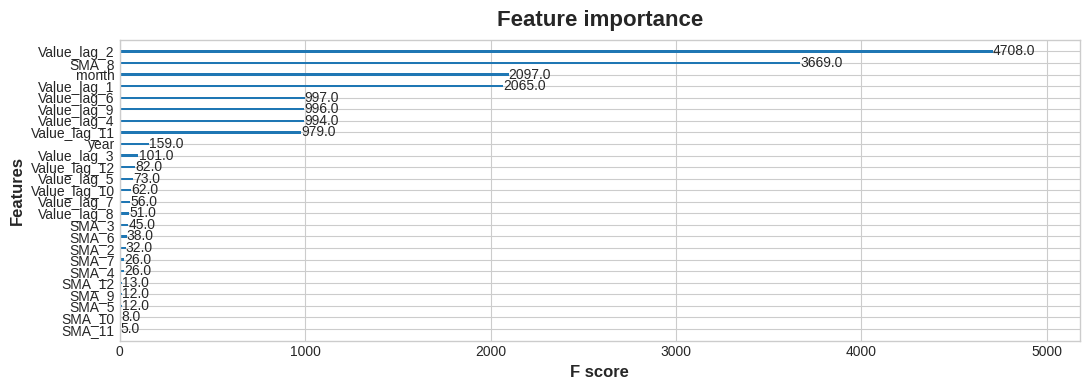

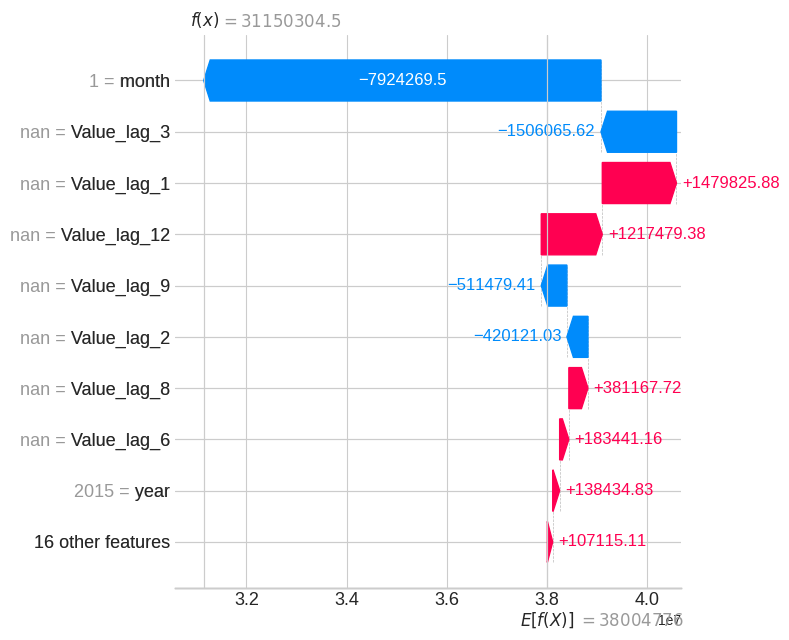

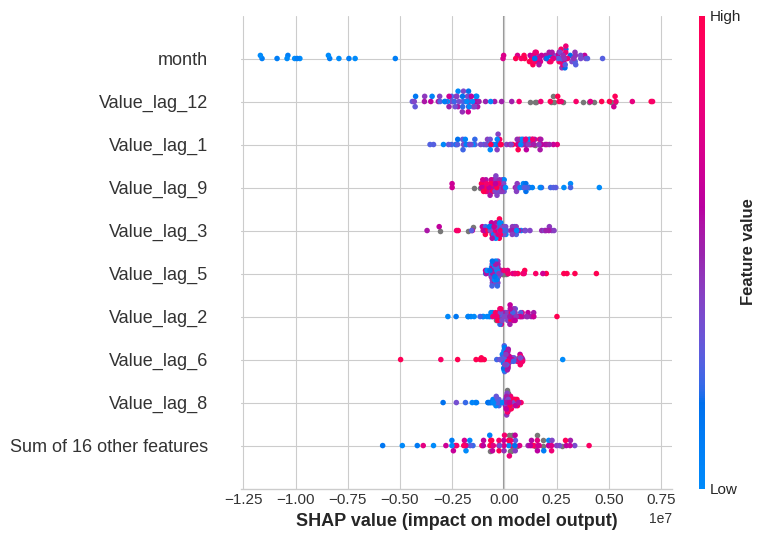

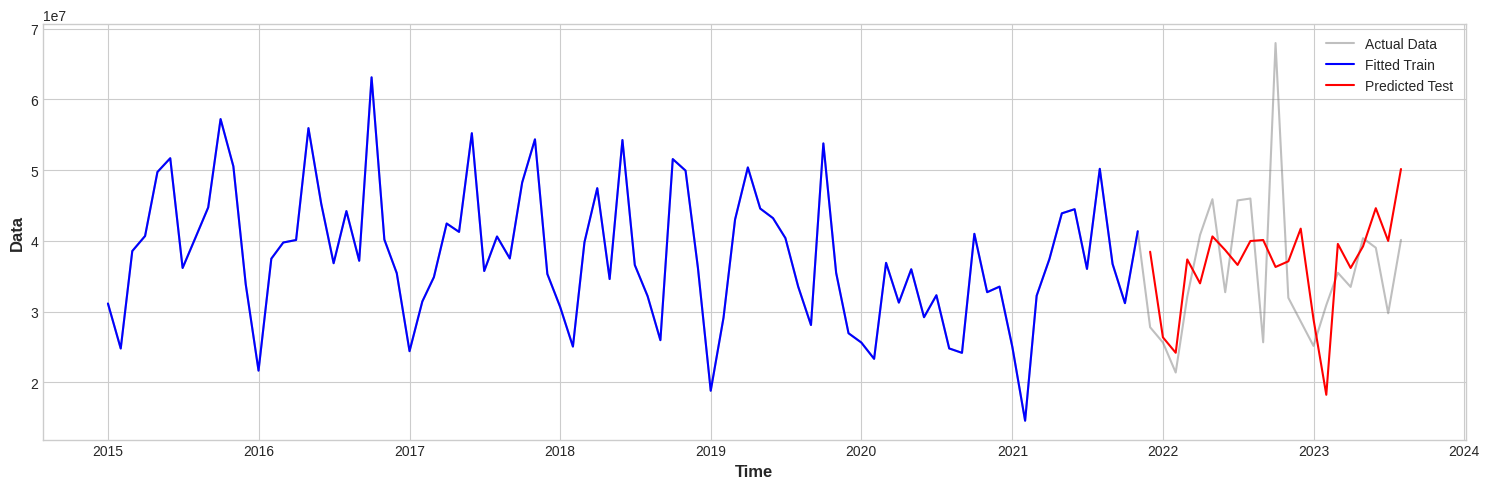

training MAPE XGB: 1.0005520193467292e-07
testing RMSE XGB: 10290252.787488602
testing MAE XGB: 7960310.666666667
testing MAPE XGB: 0.22224453687934215


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 1.0005520193467292e-07,
 0.22224453687934215)

In [ ]:
train_XGBoost(value22, 'Value')

(83, 25) (21, 25) (83,) (21,)


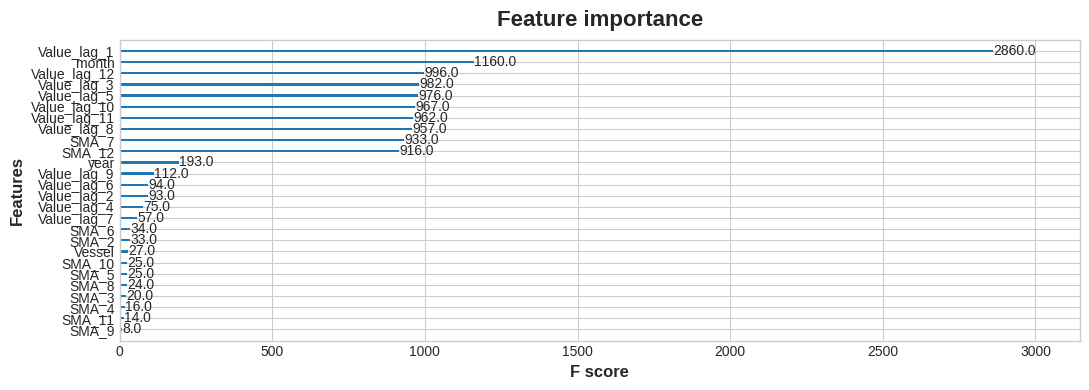

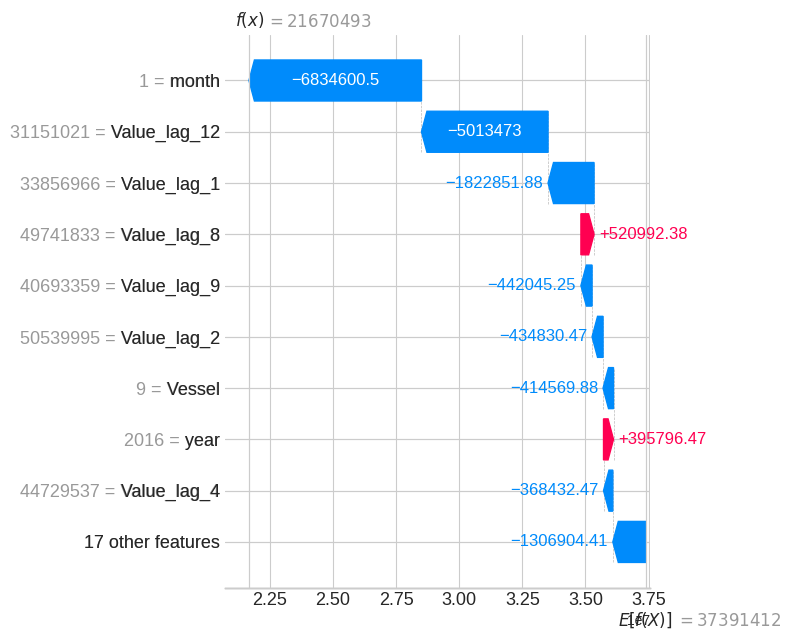

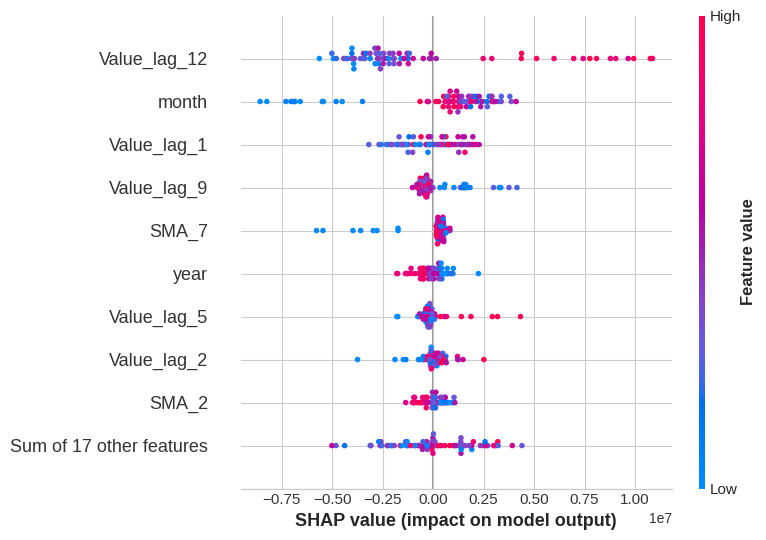

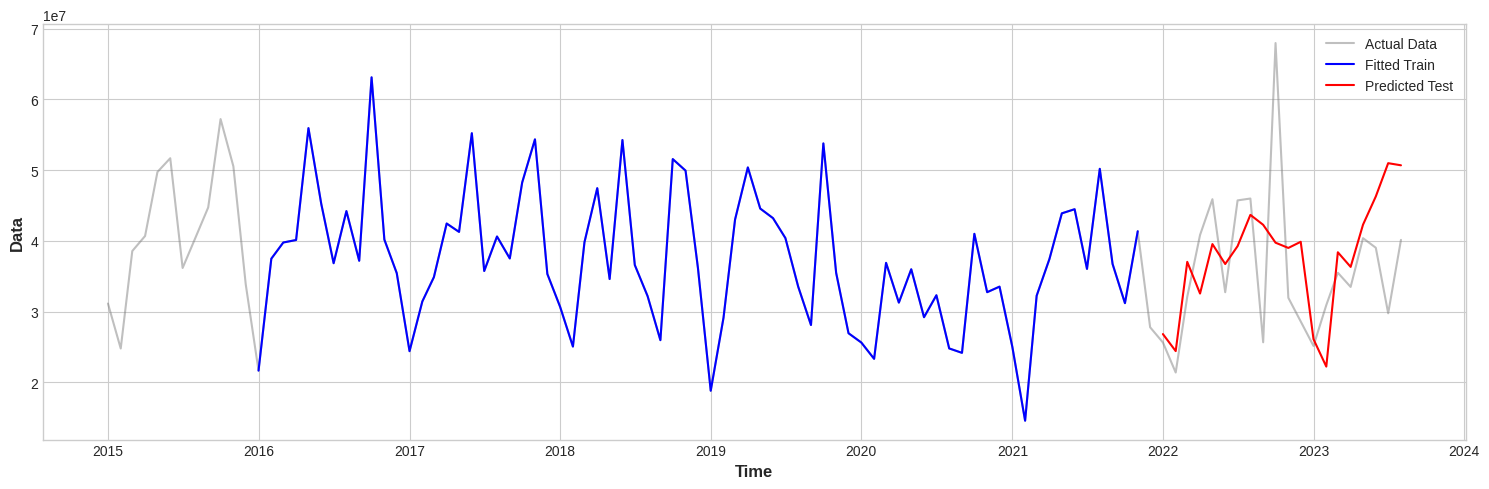

training MAPE XGB: 8.947357791328294e-08
testing RMSE XGB: 10402502.03011208
testing MAE XGB: 7794673.35
testing MAPE XGB: 0.21815133302066028


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 8.947357791328294e-08,
 0.21815133302066028,
 10402502.03011208,
 7794673.35)

In [ ]:
train_XGBoost_w(value22, 'Value')

(83, 25) (21, 25) (83,) (21,)


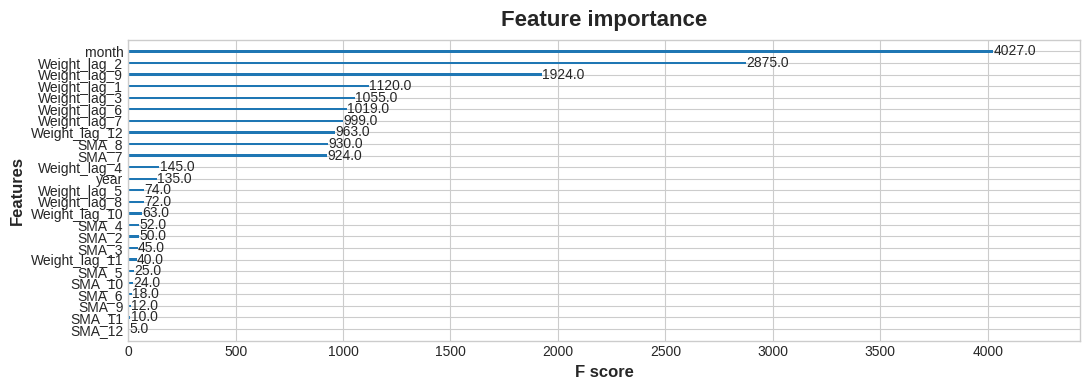

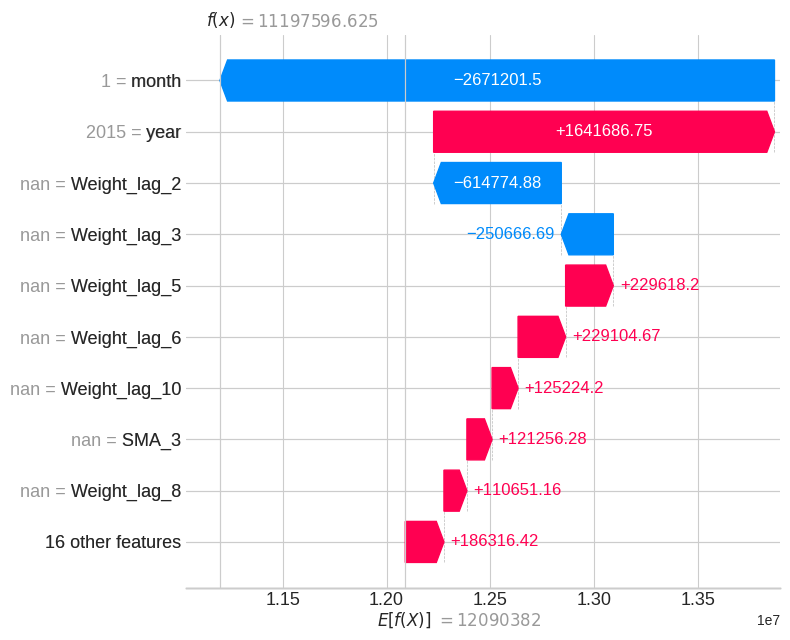

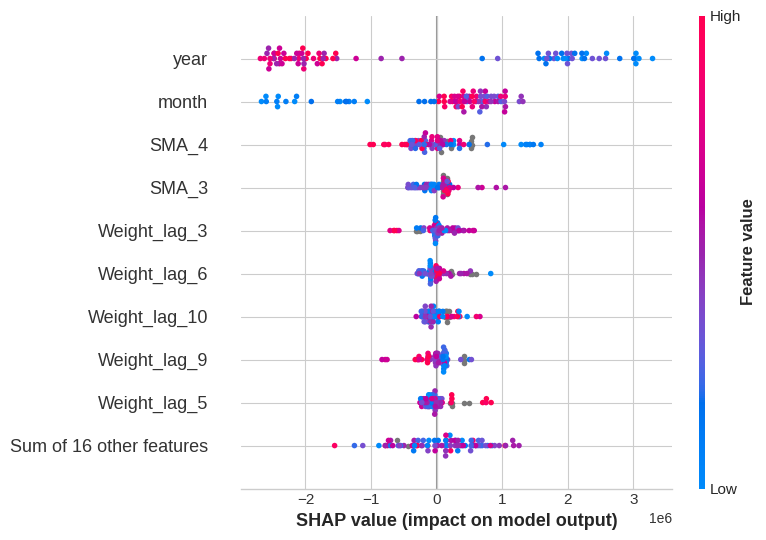

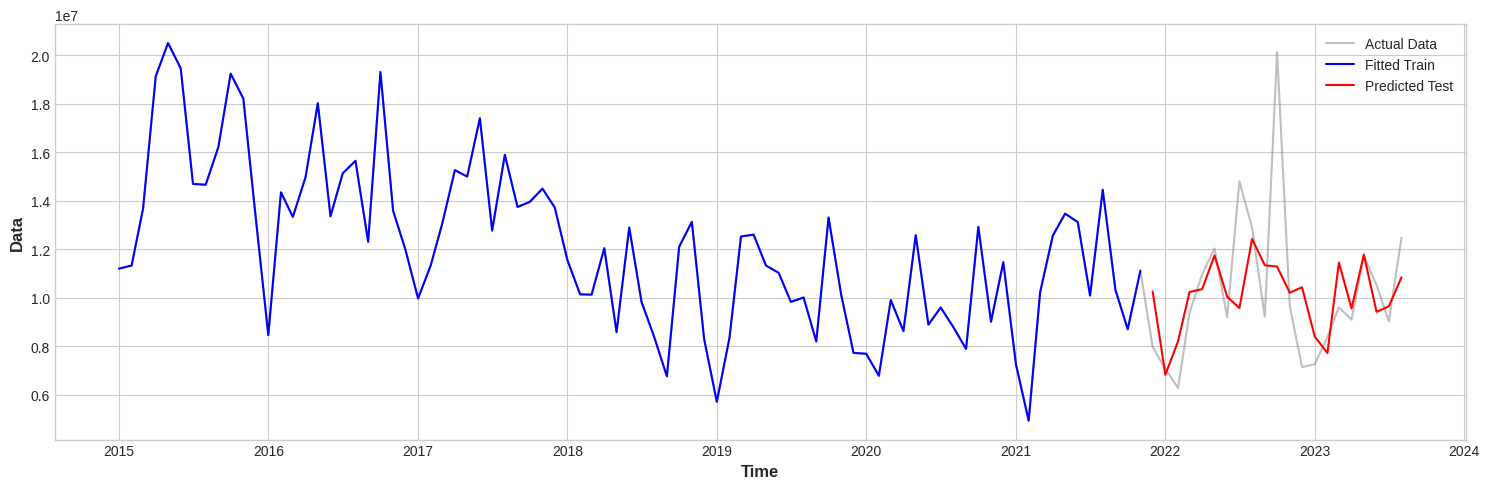

training MAPE XGB: 9.408790545633146e-08
testing RMSE XGB: 2601240.6892301594
testing MAE XGB: 1672315.1904761905
testing MAPE XGB: 0.15531643552303395


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 9.408790545633146e-08,
 0.15531643552303395)

In [ ]:
train_XGBoost(weight22, 'Weight')

(83, 25) (21, 25) (83,) (21,)


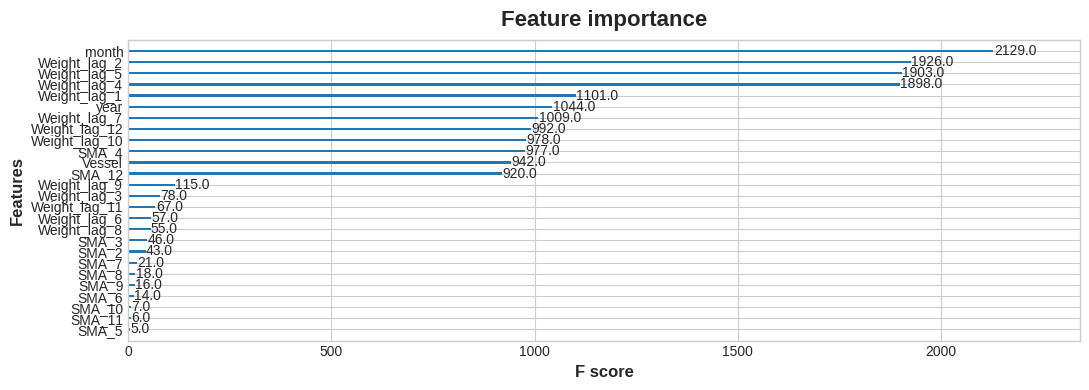

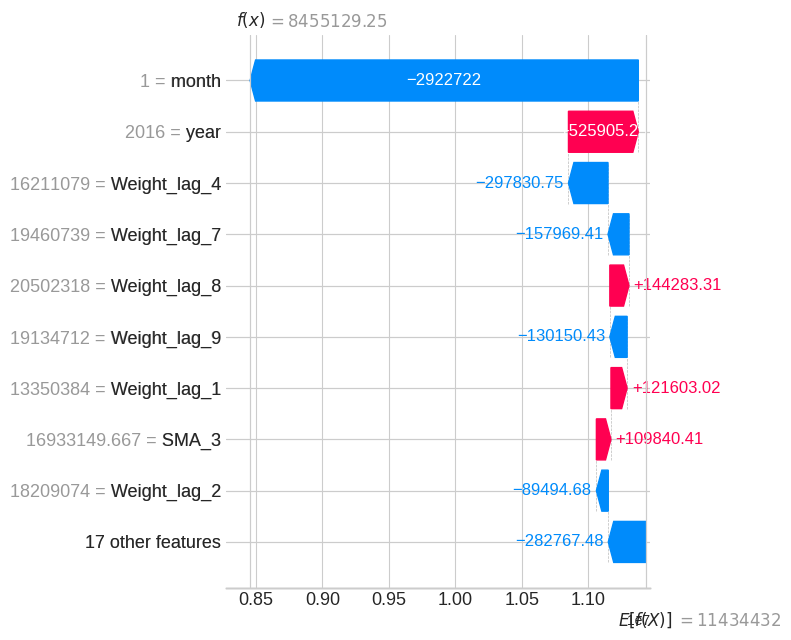

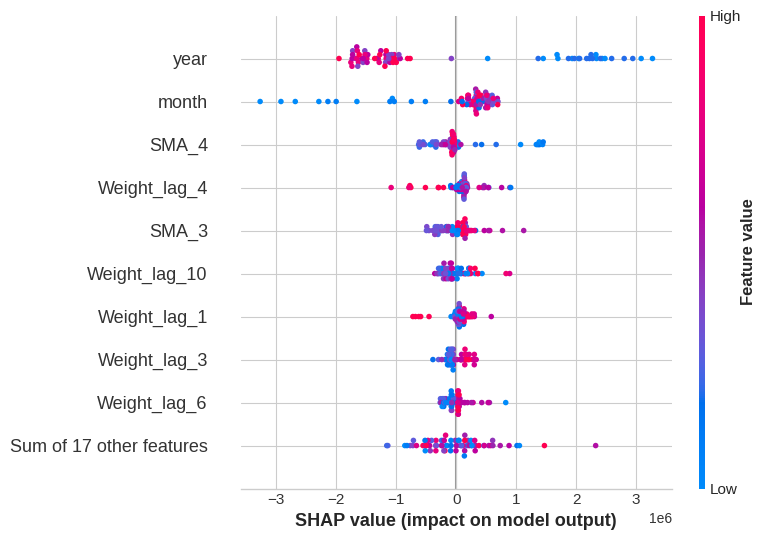

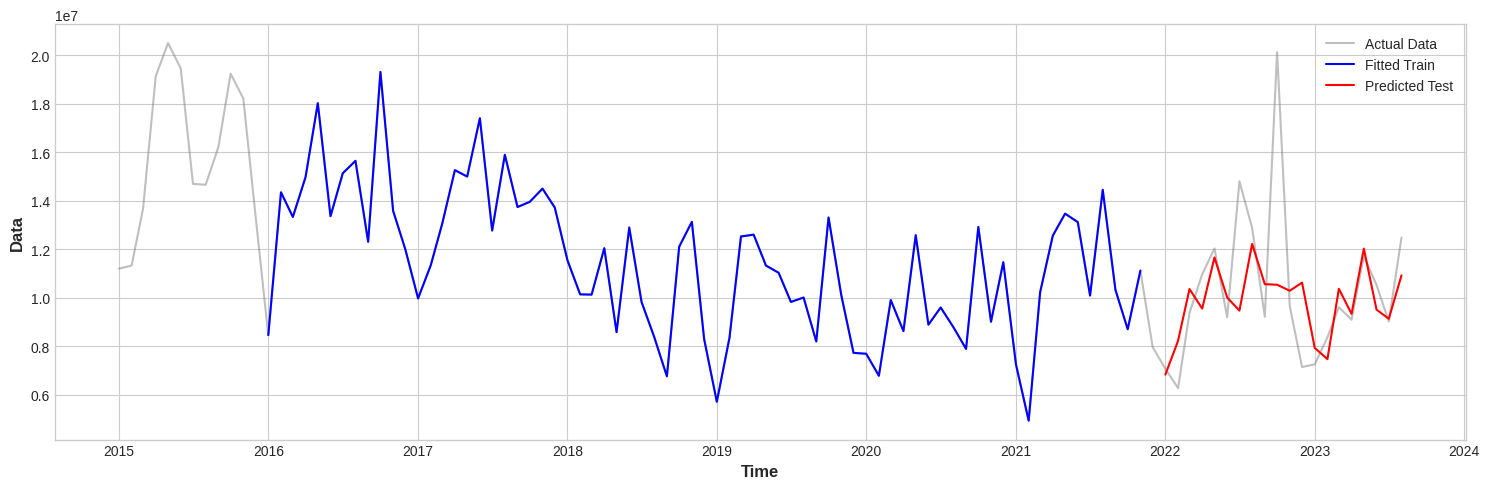

training MAPE XGB: 1.0342308378198327e-07
testing RMSE XGB: 2724209.7681973437
testing MAE XGB: 1619943.6
testing MAPE XGB: 0.1426279697671468


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 1.0342308378198327e-07,
 0.1426279697671468,
 2724209.7681973437,
 1619943.6)

In [ ]:
train_XGBoost_w(weight22, 'Weight')

(83, 25) (21, 25) (83,) (21,)


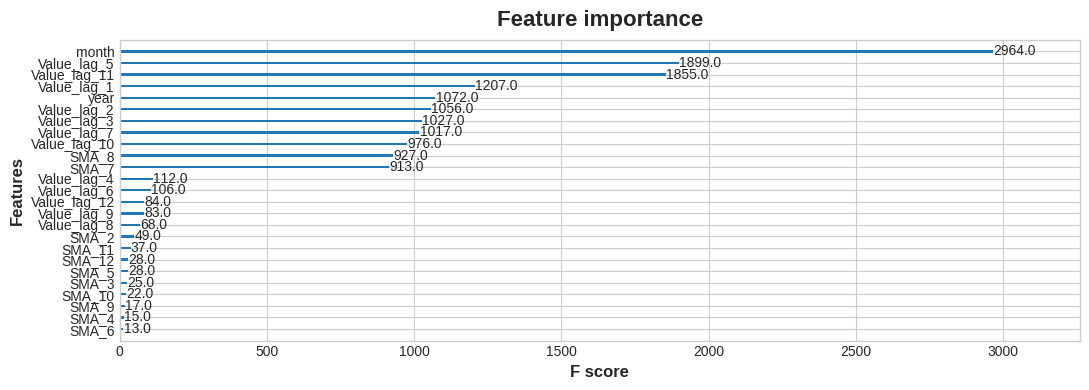

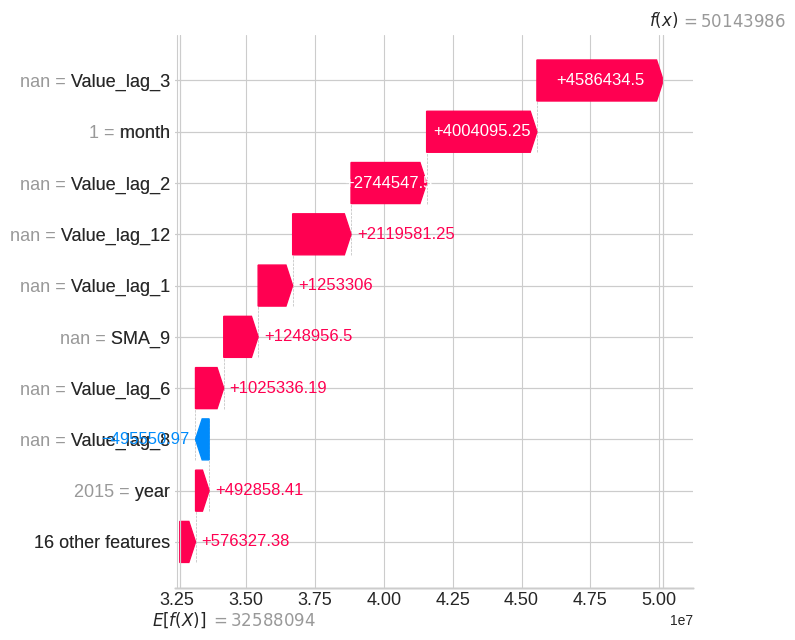

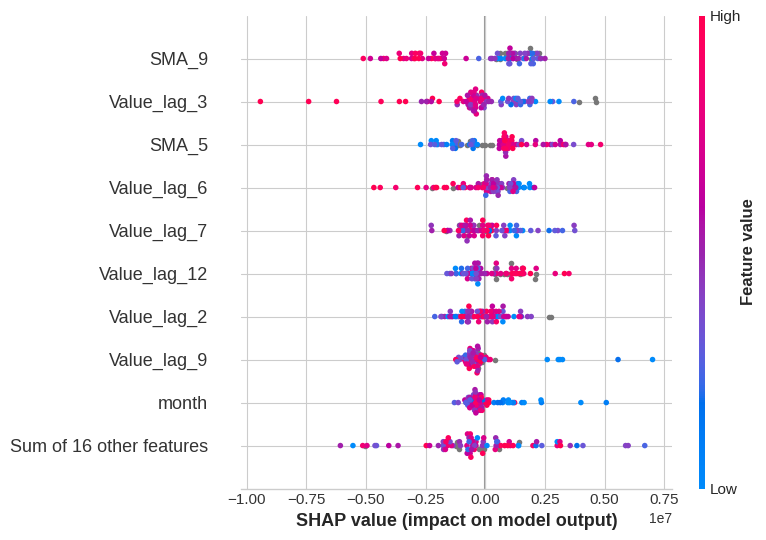

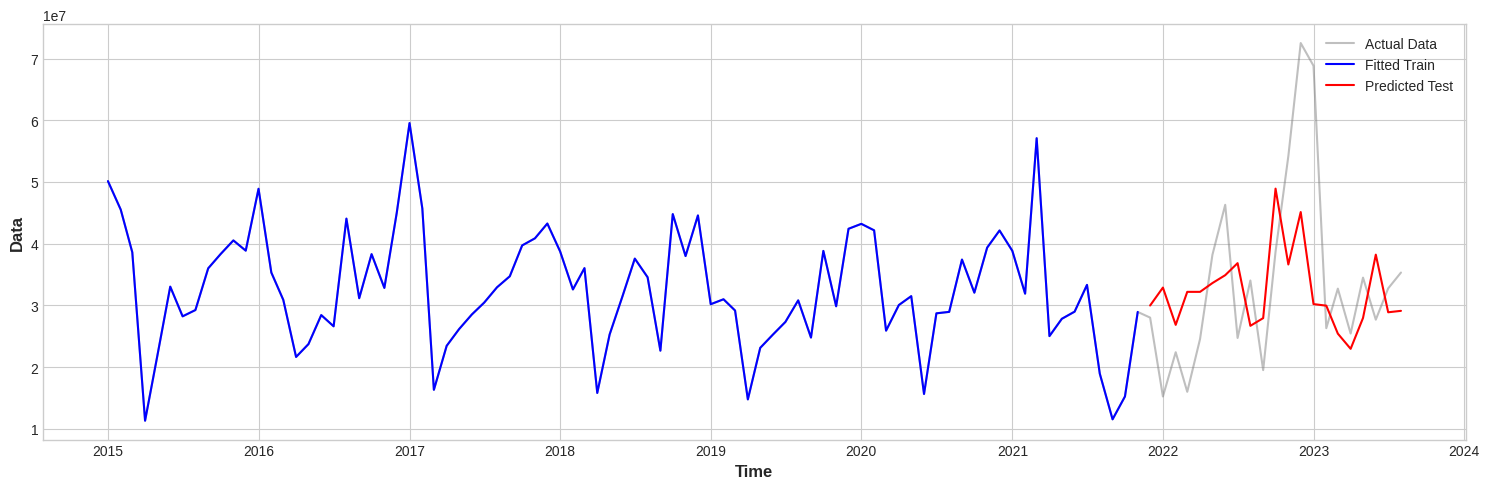

training MAPE XGB: 8.415540293303943e-08
testing RMSE XGB: 13824536.644121688
testing MAE XGB: 10768731.333333334
testing MAPE XGB: 0.3383492039844332


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 8.415540293303943e-08,
 0.3383492039844332)

In [ ]:
train_XGBoost(value03, 'Value')

(83, 25) (21, 25) (83,) (21,)


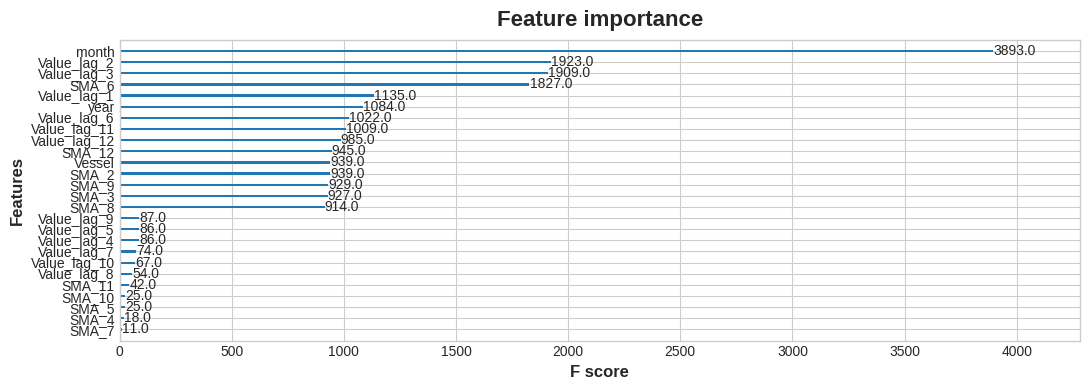

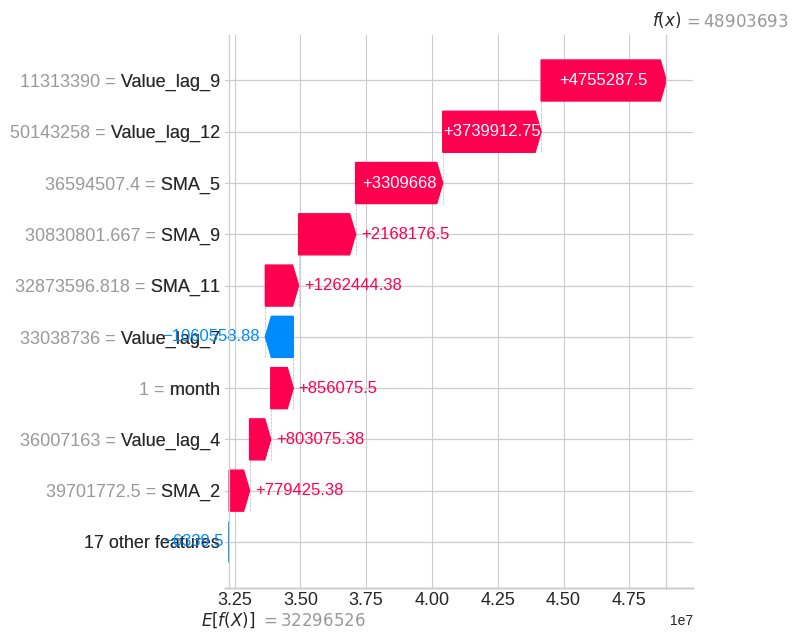

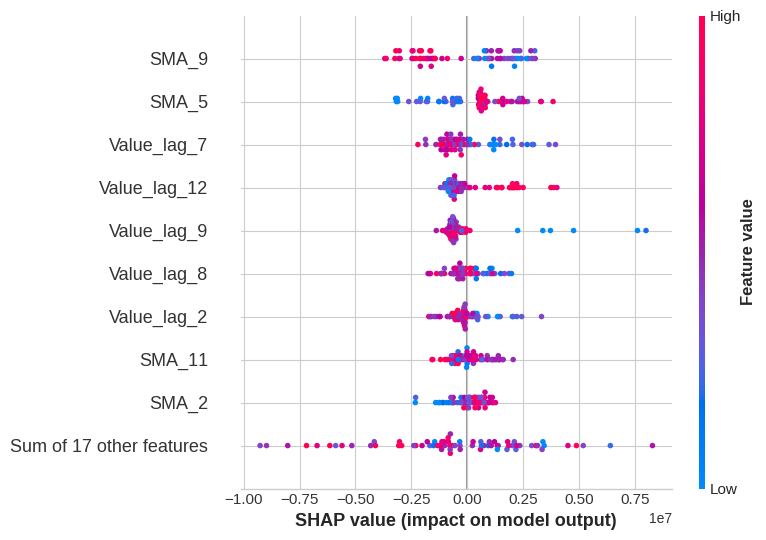

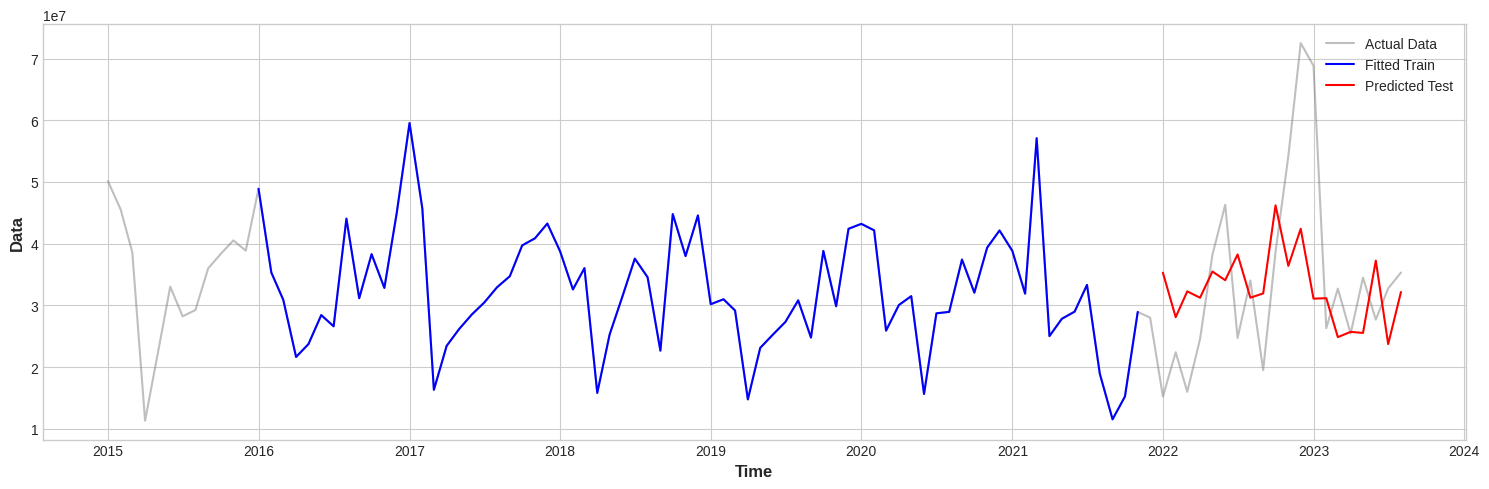

training MAPE XGB: 7.965406385124051e-08
testing RMSE XGB: 14659387.743529886
testing MAE XGB: 11461349.75
testing MAPE XGB: 0.36767602494283336


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 7.965406385124051e-08,
 0.36767602494283336,
 14659387.743529886,
 11461349.75)

In [ ]:
train_XGBoost_w(value03, 'Value')

(83, 25) (21, 25) (83,) (21,)


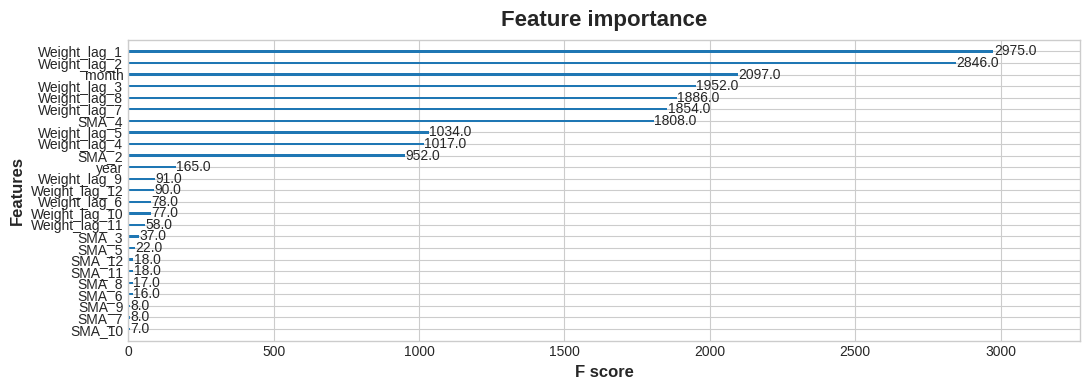

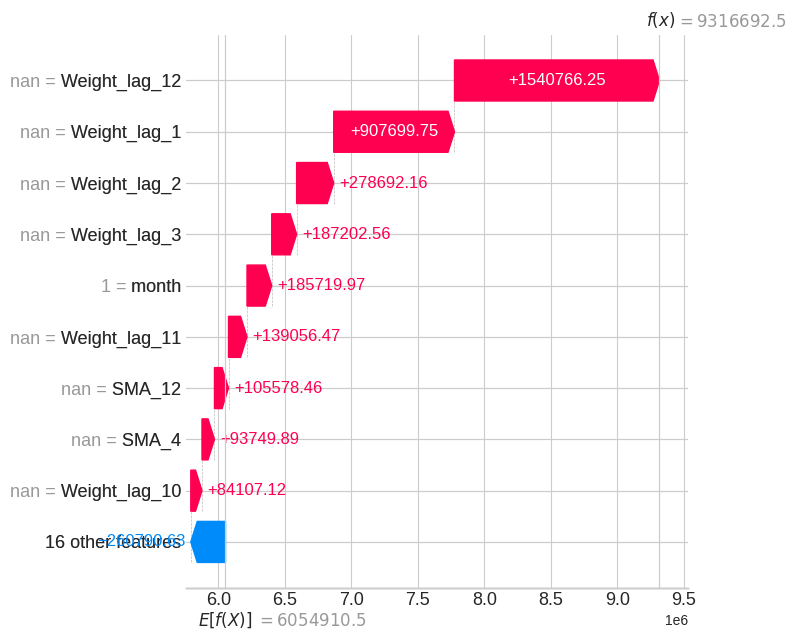

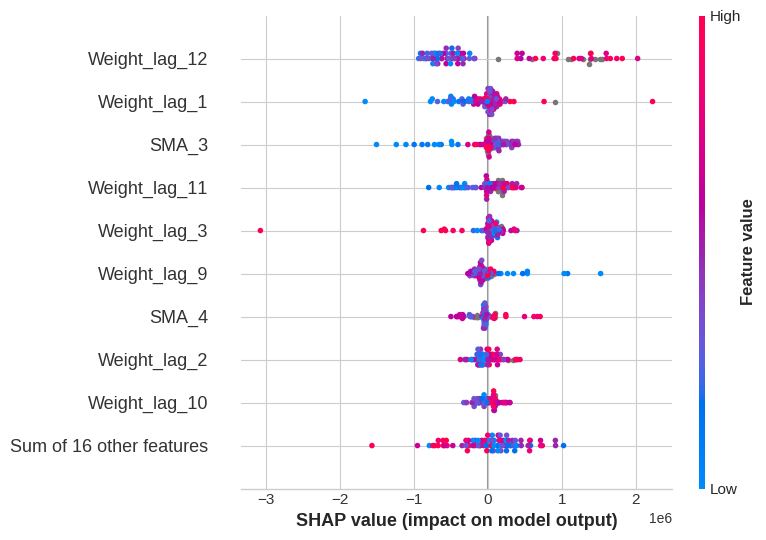

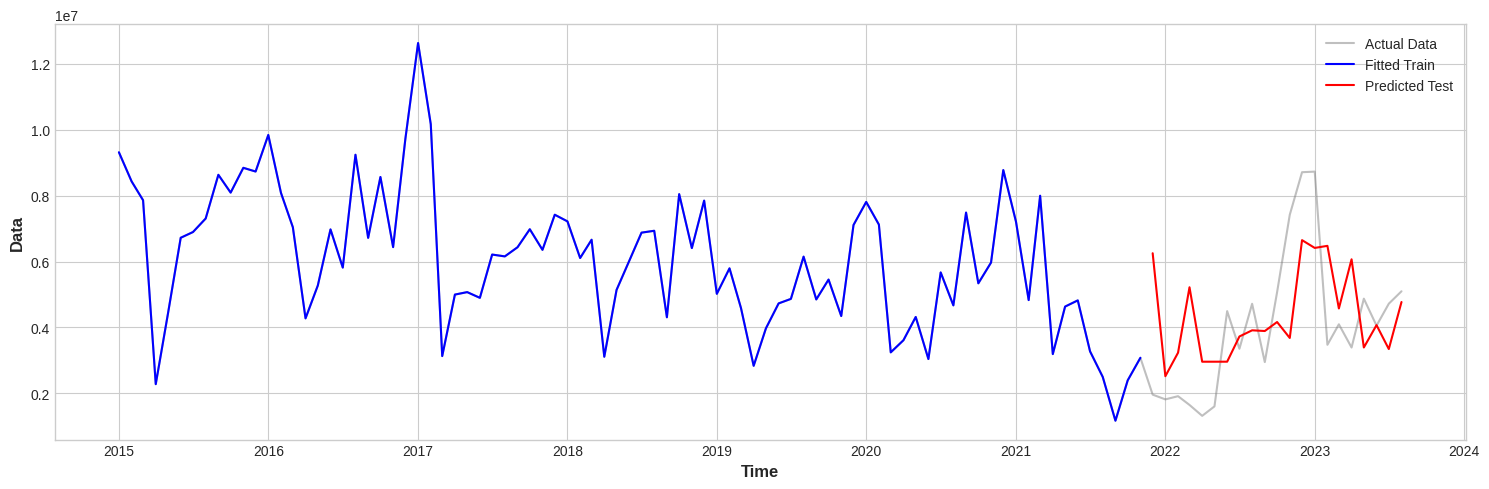

training MAPE XGB: 7.769293912980218e-08
testing RMSE XGB: 2036031.9486471384
testing MAE XGB: 1663447.3095238095
testing MAPE XGB: 0.5759682310759577


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 7.769293912980218e-08,
 0.5759682310759577)

In [ ]:
train_XGBoost(weight03, 'Weight')

(83, 25) (21, 25) (83,) (21,)


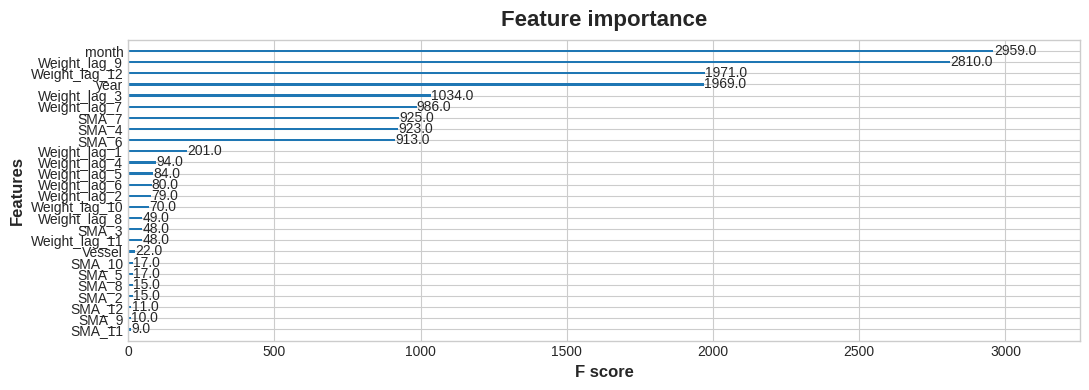

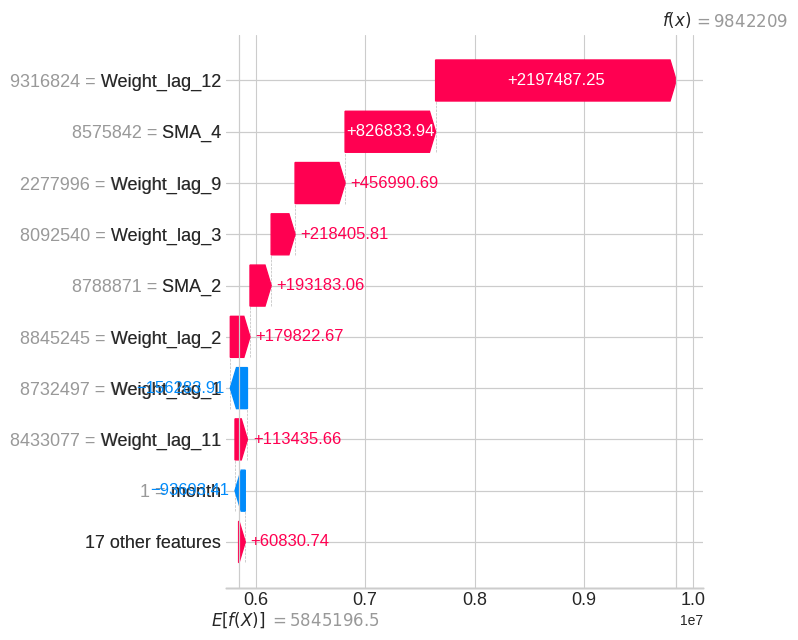

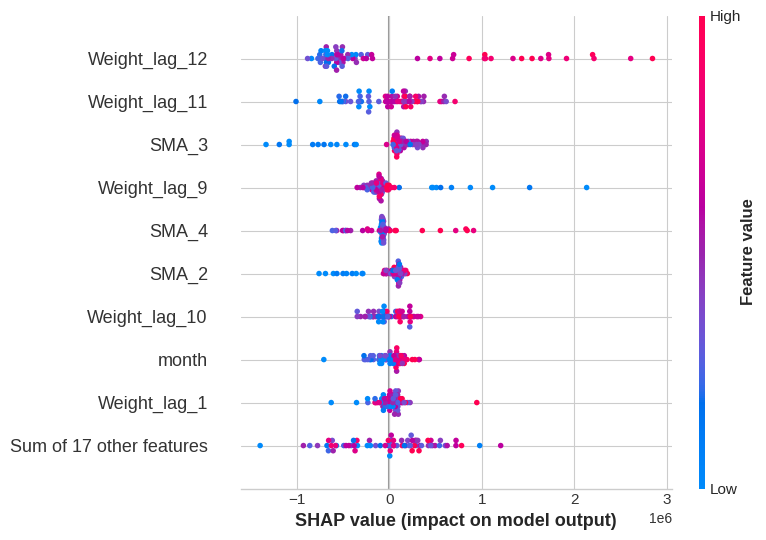

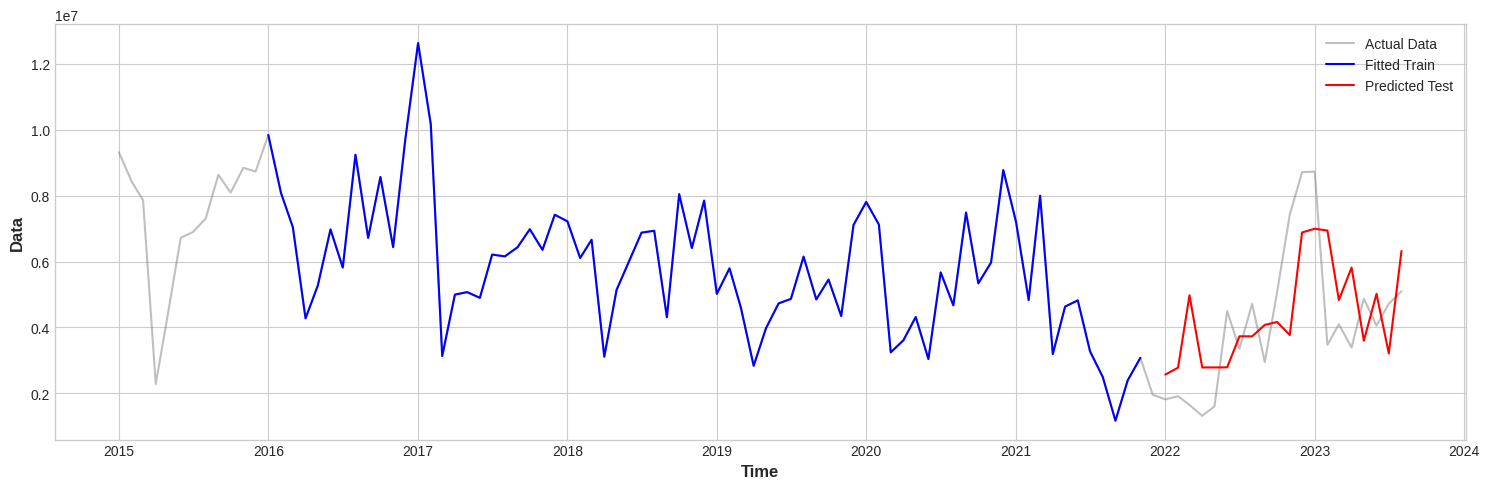

training MAPE XGB: 9.377486396946147e-08
testing RMSE XGB: 1824581.9744429365
testing MAE XGB: 1576501.3625
testing MAPE XGB: 0.4930925438886927


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 9.377486396946147e-08,
 0.4930925438886927,
 1824581.9744429365,
 1576501.3625)

In [ ]:
train_XGBoost_w(weight03, 'Weight')